### Glossary 
<br>

`Year` -- Year at time of season finale <br>
`Age` -- Player age at time of finale <br>
`Pos` -- Player position <br>
`GP` -- Number of Games Played in season <br>
`G` -- Goals <br>
`A` -- Assists <br>
`PTS` -- Points <br>
`PTS/g` -- Points per Game<br>
`PS` -- Point Shares; an estimate of the number of points contributed by a player. <br>
`PPG` -- Power Play Goals <br>
`PPA` -- Power Play Assists <br>
`Shots` -- Shots on Goal <br>
`S%` -- Shooting Percentage (total goals / total shots on goal) <br>
`TOI` -- Total Time on Ice (in minutes) <br>
`ATOI` -- Average Time on Ice per game <br>
`G/60` -- Number of goals averaged per 60 minutes of icetime<br>
`A/60` 0 -- Number of assists averaged per 60 minutes of icetime<br>

## What is my business question?
#### More of a business challenge...
<br>

##### I am hired by an NHL stats company to develop a model that will help people (the user) to `predict Goals and Assists of any given player for the upcoming NHL season`.

- revenue is driven by subscriptions to access our predictive model --> the better the model, the better our reputation, the more subscribers(users) we gain
- The user may be using this for their own personal interest, for Fantasy Hockey purposes, or for sports gambling
  - Gambling --> Can place bets on season-long results
    - Could my model be adapted in the future to predict game-by-game outcomes?
        
## What direction do I want to take?
<br>

- Can I `predict how many Goals and Assists player x will have in his next season` (pro-rated to 82 games)?
    - What metrics will I use? --> for sure I will include
        - Goals(G)
        - Assists(A)
        - Games Played(GP)
        - Points per Game(PTS/g)
        - Power Play Goals(PPG)
        - Power Play Assists(PPA)
        - Shooting Percentage(S%)
        - Time on Ice(TOI)
        - Goals per 60(G/60)
        - Assists per 60(A/60)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from scipy import stats
from scipy.stats import ttest_ind
import glob
import plotly.express as px
import plotly.graph_objects as go
from sklearn.linear_model import LinearRegression

We are going to add a 'Year' column to each .csv file (each season's data) one-by-one before compiling them all into one large dataframe. <br>


In [2]:
# # Reading csv file
# nhl2024= pd.read_csv("C:/Users/joshm/Documents/BrainStation/Capstone Project/hockey-reference.com data/nhl2024.csv", index_col=1)

# # Inserting a new 'Year' column into df
# nhl2024.insert(loc=1, column='Year', value=2024)

# # saving our modified .csv file
# nhl2024.to_csv("C:/Users/joshm/Documents/BrainStation/Capstone Project/hockey-reference.com data/nhl2024.csv")

In [3]:
# # Sort by any column
# sorted_nhl2018 = nhl2018.sort_values(by='G', ascending=False)
# sorted_nhl2018.head(30)

In [4]:
# # applying a filter (in this case gp >= 30) and then sorting.
# filtered_nhl23 = nhl23[nhl23['GP'] >= 30]
# filtered_nhl23.sort_values(by='Age', ascending=True).head(30)

In [5]:
# Combining multiple .csv files into one dataframe

# Get a list of all CSV files in the directory
csv_files = glob.glob("C:/Users/joshm/Documents/BrainStation/Capstone Project/hockey-reference.com data/*.csv")

# Initialize an empty list to store DataFrames
dfs = []

# Iterate over each CSV file
for csv_file in csv_files:
    # Read the CSV file into a DataFrame
    combined_df = pd.read_csv(csv_file, index_col=1)
    # Append the DataFrame to the list
    dfs.append(combined_df)

# Concatenate all DataFrames in the list into one DataFrame
nhl_df = pd.concat(dfs, ignore_index=True)

nhl_df

Player  Year   Age   Tm Pos  GP   G   A  PTS  +/-  ...  \
0            Joe Thornton  2006  26.0  TOT   C  81  29  96  125   31  ...   
1            Jaromír Jágr  2006  33.0  NYR  RW  82  54  69  123   34  ...   
2           Alex Ovechkin  2006  20.0  WSH  LW  81  52  54  106    2  ...   
3      Daniel Alfredsson*  2006  33.0  OTT  RW  77  43  60  103   29  ...   
4            Dany Heatley  2006  25.0  OTT  LW  82  50  53  103   29  ...   
...                   ...   ...   ...  ...  ..  ..  ..  ..  ...  ...  ...   
16932        Chris Wagner  2024  32.0  COL   C   4   0   0    0    0  ...   
16933       Samuel Walker  2024  24.0  MIN   C   4   0   0    0   -3  ...   
16934         Colin White  2024  27.0  TOT   C  13   0   0    0   -1  ...   
16935      Ryan Winterton  2024  20.0  SEA   C   3   0   0    0   -1  ...   
16936        Shane Wright  2024  20.0  SEA   C   3   0   0    0   -1  ...   

         S    S%   TOI   ATOI      -9999  BLK   HIT   FOW   FOL   FO%  
0      195  14.9  1728  21:20  thornjo01  NaN   NaN   NaN   NaN   NaN  
1      368  14.7  1810  22:05   jagrja01  NaN   NaN   NaN   NaN   NaN  
2      425  12.2  1751  21:37  ovechal01  NaN   NaN   NaN   NaN   NaN  
3      249  17.3  1670  21:41  alfreda01  NaN   NaN   NaN   NaN   NaN  
4      300  16.7  1734  21:09  heatlda01  NaN   NaN   NaN   NaN   NaN  
...    ...   ...   ...    ...        ...  ...   ...   ...   ...   ...  
16932    2   0.0    28   6:54  wagnech01  0.0  11.0   7.0   3.0  70.0  
16933    3   0.0    37   9:22  walkesa01  1.0   2.0   0.0   1.0   0.0  
16934   10   0.0   131  10:02  whiteco02  5.0  13.0  16.0  13.0  55.2  
16935    1   0.0    25   8:12  wintery01  1.0   3.0   0.0   0.0   NaN  
16936    1   0.0    29   9:48  wrighsh01  3.0   1.0   8.0   3.0  72.7  

[16937 rows x 29 columns]

In [7]:
nhl_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16937 entries, 0 to 16936
Data columns (total 29 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Player  16937 non-null  object 
 1   Year    16937 non-null  int64  
 2   Age     16935 non-null  float64
 3   Tm      16937 non-null  object 
 4   Pos     16937 non-null  object 
 5   GP      16937 non-null  int64  
 6   G       16937 non-null  int64  
 7   A       16937 non-null  int64  
 8   PTS     16937 non-null  int64  
 9   +/-     16937 non-null  int64  
 10  PIM     16937 non-null  int64  
 11  PS      16937 non-null  float64
 12  EV      16937 non-null  int64  
 13  PP      16937 non-null  int64  
 14  SH      16937 non-null  int64  
 15  GW      16937 non-null  int64  
 16  EV.1    16937 non-null  int64  
 17  PP.1    16937 non-null  int64  
 18  SH.1    16937 non-null  int64  
 19  S       16937 non-null  int64  
 20  S%      16430 non-null  float64
 21  TOI     16937 non-null  int64  
 22

In [8]:
nhl_df.shape

(16937, 29)

In [9]:
# Dropping unwanted columns
nhl_df.drop(columns=['Tm','Pos','PIM','EV','SH','GW','EV.1','SH.1','BLK','HIT','FOW','FOL','FO%','ATOI','-9999'], inplace=True)
nhl_df

Player  Year   Age  GP   G   A  PTS  +/-    PS  PP  PP.1  \
0            Joe Thornton  2006  26.0  81  29  96  125   31  13.3  11    40   
1            Jaromír Jágr  2006  33.0  82  54  69  123   34  15.5  24    28   
2           Alex Ovechkin  2006  20.0  81  52  54  106    2  12.7  21    31   
3      Daniel Alfredsson*  2006  33.0  77  43  60  103   29  12.3  16    32   
4            Dany Heatley  2006  25.0  82  50  53  103   29  12.9  23    20   
...                   ...   ...   ...  ..  ..  ..  ...  ...   ...  ..   ...   
16932        Chris Wagner  2024  32.0   4   0   0    0    0   0.0   0     0   
16933       Samuel Walker  2024  24.0   4   0   0    0   -3  -0.2   0     0   
16934         Colin White  2024  27.0  13   0   0    0   -1  -0.3   0     0   
16935      Ryan Winterton  2024  20.0   3   0   0    0   -1  -0.1   0     0   
16936        Shane Wright  2024  20.0   3   0   0    0   -1  -0.1   0     0   

         S    S%   TOI  
0      195  14.9  1728  
1      368  14.7  1810  
2      425  12.2  1751  
3      249  17.3  1670  
4      300  16.7  1734  
...    ...   ...   ...  
16932    2   0.0    28  
16933    3   0.0    37  
16934   10   0.0   131  
16935    1   0.0    25  
16936    1   0.0    29  

[16937 rows x 14 columns]

In [10]:
# Renaming some columns
nhl_df.rename(columns={'PS':'PtSh','PP':'PPG','PP.1':'PPA', 'S':'Shots', '-9999':'PlayerID'}, inplace=True)
nhl_df

Player  Year   Age  GP   G   A  PTS  +/-  PtSh  PPG  PPA  \
0            Joe Thornton  2006  26.0  81  29  96  125   31  13.3   11   40   
1            Jaromír Jágr  2006  33.0  82  54  69  123   34  15.5   24   28   
2           Alex Ovechkin  2006  20.0  81  52  54  106    2  12.7   21   31   
3      Daniel Alfredsson*  2006  33.0  77  43  60  103   29  12.3   16   32   
4            Dany Heatley  2006  25.0  82  50  53  103   29  12.9   23   20   
...                   ...   ...   ...  ..  ..  ..  ...  ...   ...  ...  ...   
16932        Chris Wagner  2024  32.0   4   0   0    0    0   0.0    0    0   
16933       Samuel Walker  2024  24.0   4   0   0    0   -3  -0.2    0    0   
16934         Colin White  2024  27.0  13   0   0    0   -1  -0.3    0    0   
16935      Ryan Winterton  2024  20.0   3   0   0    0   -1  -0.1    0    0   
16936        Shane Wright  2024  20.0   3   0   0    0   -1  -0.1    0    0   

       Shots    S%   TOI  
0        195  14.9  1728  
1        368  14.7  1810  
2        425  12.2  1751  
3        249  17.3  1670  
4        300  16.7  1734  
...      ...   ...   ...  
16932      2   0.0    28  
16933      3   0.0    37  
16934     10   0.0   131  
16935      1   0.0    25  
16936      1   0.0    29  

[16937 rows x 14 columns]

In [11]:
# What about null values?

nhl_df.isnull().sum()

Player      0
Year        0
Age         2
GP          0
G           0
A           0
PTS         0
+/-         0
PtSh        0
PPG         0
PPA         0
Shots       0
S%        507
TOI         0
dtype: int64

In [12]:
rows_with_null_age = nhl_df[nhl_df['Age'].isnull()]
rows_with_null_age

Player  Year  Age  GP  G  A  PTS  +/-  PtSh  PPG  PPA  Shots  \
15927  Jake Livingstone  2023  NaN   5  0  1    1   -2   0.1    0    0      3   
15988  Elliot Desnoyers  2023  NaN   4  0  0    0   -2  -0.2    0    0      3   

        S%  TOI  
15927  0.0   77  
15988  0.0   53

In [13]:
# Looking at the rows that have Null values in the shooting percentage column
rows_with_null_SPerc = nhl_df[nhl_df['S%'].isnull()].sort_values(by='GP', ascending=False)
rows_with_null_SPerc 

Player  Year   Age  GP  G  A  PTS  +/-  PtSh  PPG  PPA  \
6074     Steve MacIntyre  2012  31.0  12  0  0    0    0  -0.1    0    0   
1541         Nate Guenin  2007  24.0   9  0  2    2    0   0.3    0    0   
1677       Dan LaCouture  2007  29.0   6  0  0    0    0   0.0    0    0   
1681            Reed Low  2007  30.0   6  0  0    0   -1  -0.1    0    0   
9616         Brad Stuart  2016  36.0   6  0  0    0   -2  -0.1    0    0   
...                  ...   ...   ...  .. .. ..  ...  ...   ...  ...  ...   
6951          Andy Miele  2013  24.0   1  0  0    0    1   0.0    0    0   
6950     Steve MacIntyre  2013  32.0   1  0  0    0    0   0.0    0    0   
6948       Shawn Lalonde  2013  22.0   1  0  0    0    1   0.1    0    0   
6947      Bracken Kearns  2013  31.0   1  0  0    0    0   0.0    0    0   
16926  Victor Söderström  2024  22.0   1  0  0    0    0   0.0    0    0   

       Shots  S%  TOI  
6074       0 NaN   38  
1541       0 NaN   78  
1677       0 NaN   30  
1681       0 NaN   21  
9616       0 NaN   84  
...      ...  ..  ...  
6951       0 NaN    9  
6950       0 NaN    5  
6948       0 NaN   15  
6947       0 NaN   12  
16926      0 NaN   13  

[507 rows x 14 columns]

We can see that all of these null values come from players that have played very few games in the given season....

# Do I care about players that have played so few games?
## The "tweeners" - players that are not regulars in the NHL.<br> Maybe they get "called up" for a few games but cannot stick in the league.
### Are they relevant to my objectives?
#### Does the additional data provided from these players have any usefulness for me?
##### A lot of these types of tweeners could be considered outliers. They likely do not represent the true mean talent level of the NHL population.
<br>

## I am going to set a filter that excludes all players that have played less than 13 games in a given season

In [14]:
# setting a new dataframe that excludes all players that have played less than 13 games in any given season

nhl_df2 = nhl_df[nhl_df['GP'] >= 13]
nhl_df2.sort_values(by='PTS', ascending=False)

Player  Year   Age  GP   G   A  PTS  +/-  PtSh  PPG  PPA  \
15117     Connor McDavid  2023  26.0  82  64  89  153   22  18.2   21   50   
15118     Leon Draisaitl  2023  27.0  80  52  76  128    7  14.2   32   30   
11412    Nikita Kucherov  2019  25.0  82  41  87  128   24  14.6   15   33   
0           Joe Thornton  2006  26.0  81  29  96  125   31  13.3   11   40   
1           Jaromír Jágr  2006  33.0  82  54  69  123   34  15.5   24   28   
...                  ...   ...   ...  ..  ..  ..  ...  ...   ...  ...  ...   
15101  Victor Söderström  2022  20.0  16   0   0    0   -7  -0.2    0    0   
790      Steven Goertzen  2006  21.0  39   0   0    0  -17  -1.2    0    0   
801          Cam Janssen  2006  21.0  47   0   0    0   -3  -0.5    0    0   
832           Ben Ondrus  2006  23.0  22   0   0    0  -10  -0.8    0    0   
16934        Colin White  2024  27.0  13   0   0    0   -1  -0.3    0    0   

       Shots    S%   TOI  
15117    352  18.2  1836  
15118    247  21.1  1739  
11412    246  16.7  1637  
0        195  14.9  1728  
1        368  14.7  1810  
...      ...   ...   ...  
15101     14   0.0   261  
790       23   0.0   333  
801       10   0.0   222  
832       17   0.0   223  
16934     10   0.0   131  

[13599 rows x 14 columns]

In [15]:
nhl_df2.isnull().sum()

Player    0
Year      0
Age       0
GP        0
G         0
A         0
PTS       0
+/-       0
PtSh      0
PPG       0
PPA       0
Shots     0
S%        0
TOI       0
dtype: int64

As we can see, this filtering has eliminated all of the null values from our data set

#### Next I am going to attempt to create some new metrics --> 
- Points per game (PTS/g) average
- Goals per 60(G/60) and Assists per 60(A/60) which are indicators which normalize icetime differences across players<br>
    - Effectively levelling the playing field and allowing us to measure production of goals and assists regardless of icetime

In [16]:
# Points per game calculation

# nhl_df.loc[:, 'PTS/g'] = (nhl_df['PTS'] / nhl_df['GP']).round(2)
# nhl_df

In [17]:
# columns = list(nhl_df.columns)

# # Remove the column to move from its current position
# columns.remove('PTS/g')

# # Insert the column at the new position
# columns.insert(7, 'PTS/g')

# # Reassign the column order by selecting columns in the new order
# nhl_df = nhl_df[columns]

# # Display the DataFrame after moving the column
# nhl_df.head()

In [18]:
# creating a new average time on ice per game column that is a floating point, rather than an object.
# this will be a proxy for Time on Ice per 60 minutes (very close to it), which is used to calculate G/60 and A/60

# nhl_df.loc[:, 'TOI/GP'] = (nhl_df['TOI'] / nhl_df['GP']).round(2)


In [19]:
# Note all attributes are now either integer or floting point
nhl_df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13599 entries, 0 to 16934
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Player  13599 non-null  object 
 1   Year    13599 non-null  int64  
 2   Age     13599 non-null  float64
 3   GP      13599 non-null  int64  
 4   G       13599 non-null  int64  
 5   A       13599 non-null  int64  
 6   PTS     13599 non-null  int64  
 7   +/-     13599 non-null  int64  
 8   PtSh    13599 non-null  float64
 9   PPG     13599 non-null  int64  
 10  PPA     13599 non-null  int64  
 11  Shots   13599 non-null  int64  
 12  S%      13599 non-null  float64
 13  TOI     13599 non-null  int64  
dtypes: float64(3), int64(10), object(1)
memory usage: 1.6+ MB


In [20]:
nhl_df2.head(15)

Player  Year   Age  GP   G   A  PTS  +/-  PtSh  PPG  PPA  \
0         Joe Thornton  2006  26.0  81  29  96  125   31  13.3   11   40   
1         Jaromír Jágr  2006  33.0  82  54  69  123   34  15.5   24   28   
2        Alex Ovechkin  2006  20.0  81  52  54  106    2  12.7   21   31   
3   Daniel Alfredsson*  2006  33.0  77  43  60  103   29  12.3   16   32   
4         Dany Heatley  2006  25.0  82  50  53  103   29  12.9   23   20   
5        Sidney Crosby  2006  18.0  81  39  63  102   -1  10.5   16   31   
6           Eric Staal  2006  21.0  82  45  55  100   -8  11.1   19   21   
7       Ilya Kovalchuk  2006  22.0  78  52  46   98   -6  11.2   27   29   
8          Marc Savard  2006  28.0  82  28  69   97    7   9.3   14   36   
9    Jonathan Cheechoo  2006  25.0  82  56  37   93   23  12.7   24   17   
10       Marián Hossa*  2006  27.0  80  39  53   92   17  10.2   14   25   
11       Brad Richards  2006  25.0  82  23  68   91    0   8.0    7   39   
12      Teemu Selänne*  2006  35.0  80  40  50   90   28  11.4   18   22   
13        Jason Spezza  2006  22.0  68  19  71   90   23   9.2    7   34   
14        Brian Gionta  2006  27.0  82  48  41   89   18  11.4   24   10   

    Shots    S%   TOI  
0     195  14.9  1728  
1     368  14.7  1810  
2     425  12.2  1751  
3     249  17.3  1670  
4     300  16.7  1734  
5     278  14.0  1630  
6     279  16.1  1611  
7     323  16.1  1731  
8     212  13.2  1682  
9     317  17.7  1637  
10    341  11.4  1735  
11    282   8.2  1866  
12    267  15.0  1424  
13    156  12.2  1292  
14    291  16.5  1625

## Going to try a regression analysis on one player at a time

In [21]:
crosby_df = nhl_df2[nhl_df2['Player'] == 'Sidney Crosby']

# this code solves the warning message --> crosby_df.loc[:, 'TOI/GP'] = (crosby_df['TOI'] / crosby_df['GP']).round(2)

crosby_df['TOI/GP'] = ((crosby_df['TOI'] / crosby_df['GP']).round(2))
crosby_df['G/60'] = ((crosby_df['G'] / crosby_df['TOI'])*60).round(2)
crosby_df['A/60'] = ((crosby_df['A'] / crosby_df['TOI'])*60).round(2)
crosby_df.sort_values(by=['Year'], ascending=False, ignore_index=True)

C:\Users\joshm\AppData\Local\Temp\ipykernel_22132\640474693.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  crosby_df['TOI/GP'] = ((crosby_df['TOI'] / crosby_df['GP']).round(2))
C:\Users\joshm\AppData\Local\Temp\ipykernel_22132\640474693.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  crosby_df['G/60'] = ((crosby_df['G'] / crosby_df['TOI'])*60).round(2)
C:\Users\joshm\AppData\Local\Temp\ipykernel_22132\640474693.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a D

Player  Year   Age  GP   G   A  PTS  +/-  PtSh  PPG  PPA  Shots  \
0   Sidney Crosby  2024  36.0  55  32  28   60   18   7.8    8    7    196   
1   Sidney Crosby  2023  35.0  82  33  60   93    8   9.6    9   18    255   
2   Sidney Crosby  2022  34.0  69  31  53   84   19   9.4    8   22    208   
3   Sidney Crosby  2021  33.0  55  24  38   62    8   7.0    5   17    159   
4   Sidney Crosby  2020  32.0  41  16  31   47   -8   4.7    4   13    109   
5   Sidney Crosby  2019  31.0  79  35  65  100   18  11.4   12   17    220   
6   Sidney Crosby  2018  30.0  82  29  60   89    0   9.1    9   29    247   
7   Sidney Crosby  2017  29.0  75  44  45   89   17  12.3   14   11    255   
8   Sidney Crosby  2016  28.0  80  36  49   85   19  11.5   10   14    248   
9   Sidney Crosby  2015  27.0  77  28  56   84    5  10.3   10   21    237   
10  Sidney Crosby  2014  26.0  80  36  68  104   18  13.5   11   27    259   
11  Sidney Crosby  2013  25.0  36  15  41   56   26   7.5    3   14    124   
12  Sidney Crosby  2012  24.0  22   8  29   37   15   5.0    2    9     75   
13  Sidney Crosby  2011  23.0  41  32  34   66   20  10.1   10    9    161   
14  Sidney Crosby  2010  22.0  81  51  58  109   15  14.7   13   21    298   
15  Sidney Crosby  2009  21.0  77  33  70  103    3  11.1    7   33    238   
16  Sidney Crosby  2008  20.0  53  24  48   72   18   9.0    6   21    173   
17  Sidney Crosby  2007  19.0  79  36  84  120   10  13.3   13   48    250   
18  Sidney Crosby  2006  18.0  81  39  63  102   -1  10.5   16   31    278   

      S%   TOI  TOI/GP  G/60  A/60  
0   16.3  1112   20.22  1.73  1.51  
1   12.9  1652   20.15  1.20  2.18  
2   14.9  1378   19.97  1.35  2.31  
3   15.1  1122   20.40  1.28  2.03  
4   14.7   831   20.27  1.16  2.24  
5   15.9  1658   20.99  1.27  2.35  
6   11.7  1697   20.70  1.03  2.12  
7   17.3  1491   19.88  1.77  1.81  
8   14.5  1638   20.48  1.32  1.79  
9   11.8  1538   19.97  1.09  2.18  
10  13.9  1758   21.98  1.23  2.32  
11  12.1   760   21.11  1.18  3.24  
12  10.7   406   18.45  1.18  4.29  
13  19.9   899   21.93  2.14  2.27  
14  17.1  1778   21.95  1.72  1.96  
15  13.9  1690   21.95  1.17  2.49  
16  13.9  1105   20.85  1.30  2.61  
17  14.4  1640   20.76  1.32  3.07  
18  14.0  1630   20.12  1.44  2.32

In [22]:
# setting our dependent and independent variables
y = crosby_df['G']
X = crosby_df.drop(columns=['G']) # every column except 'G'

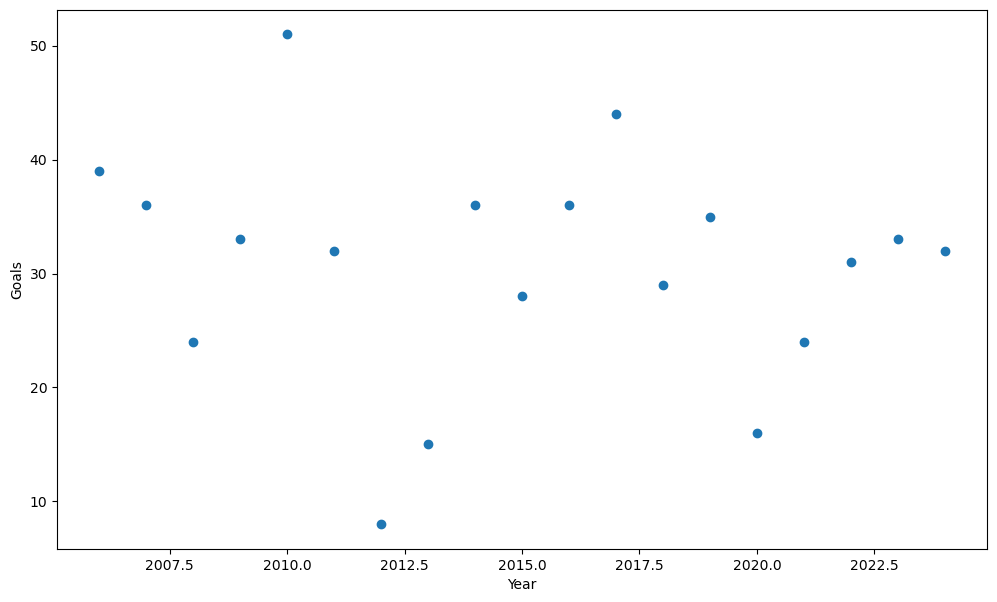

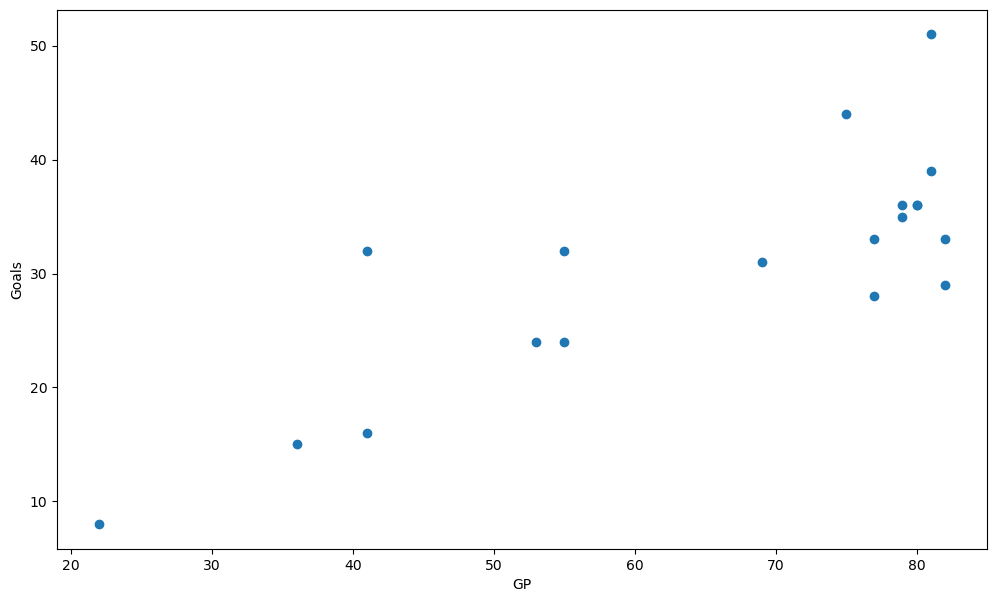

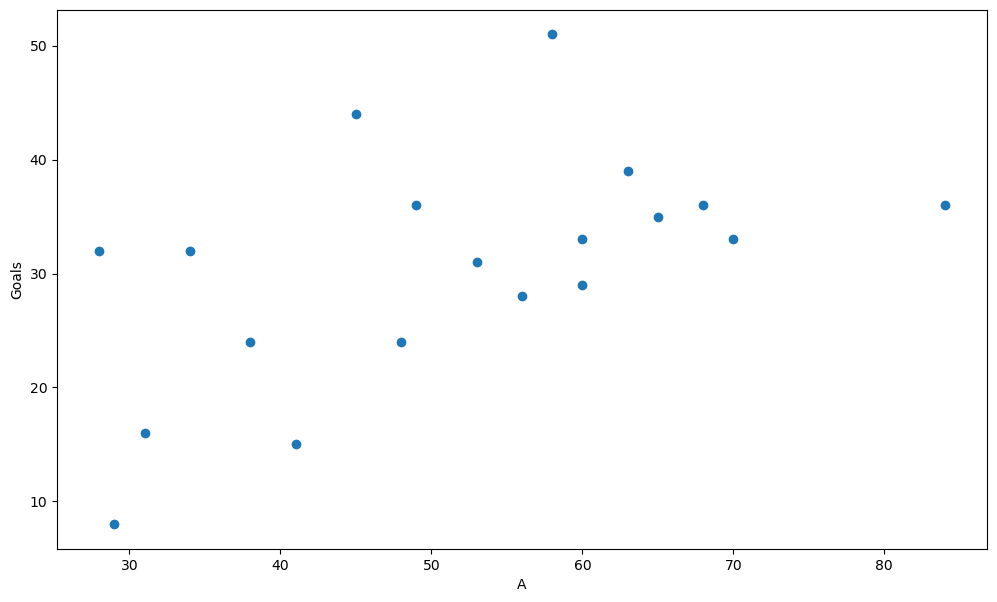

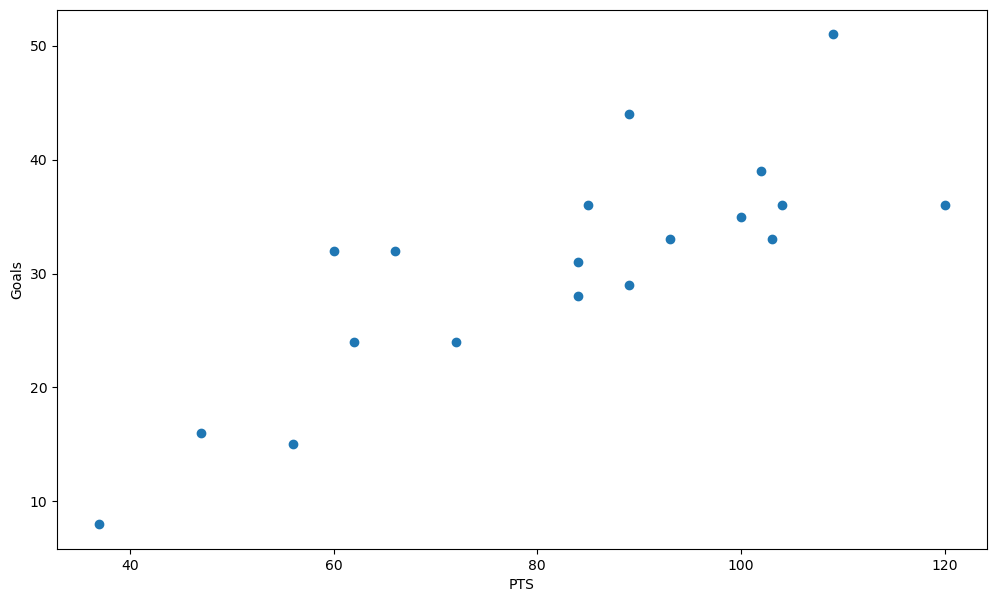

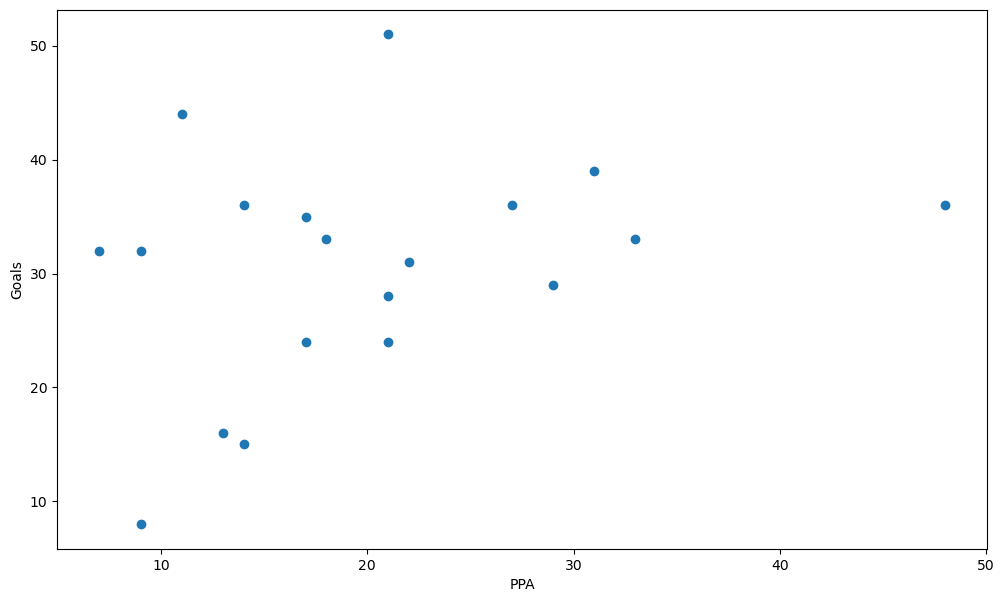

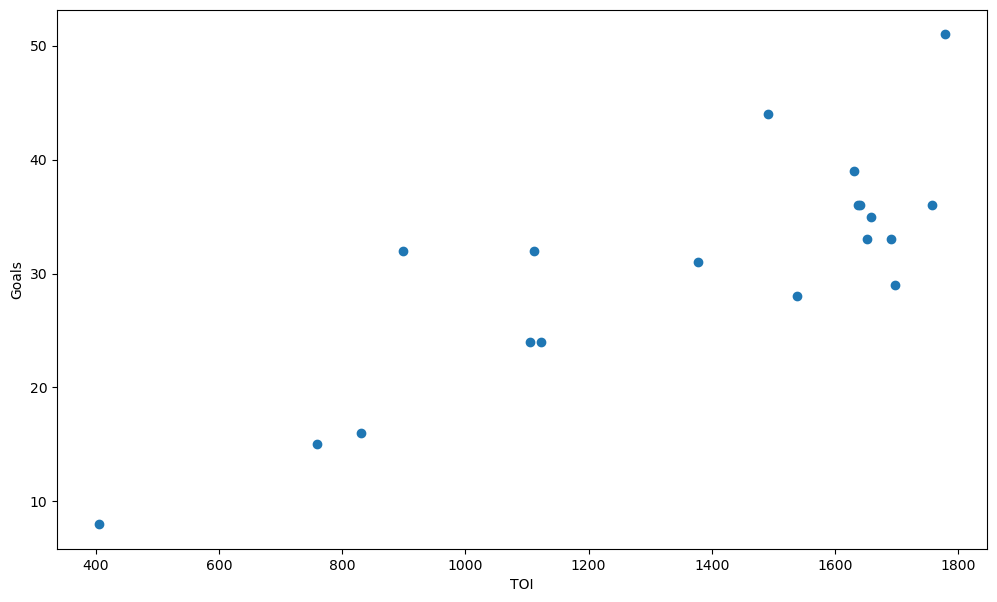

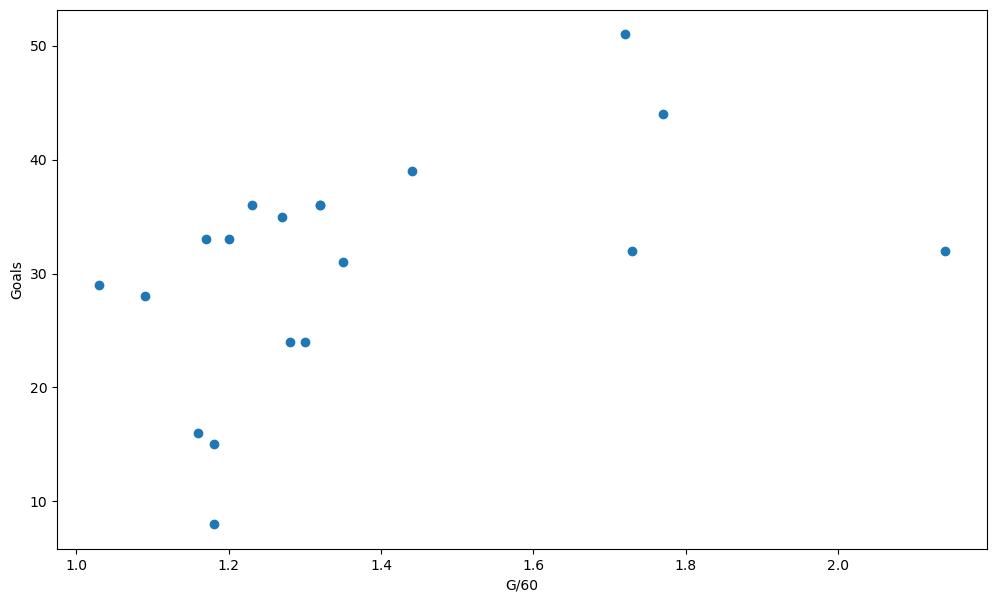

In [23]:
for col in X.columns: 
    plt.figure(figsize=(12,7))
    plt.scatter(X[col], y)
    plt.ylabel('Goals')
    plt.xlabel(col)
    plt.show()

# This is grouping by player --> career stats

In [24]:
# grouping by player and summing their stats
nhl_careertotals = nhl_df2.groupby('Player').sum().sort_values(by=['PTS'], ascending=False)
# nhl_df.loc[:, 'TOI/GP'] = (nhl_df['TOI'] / nhl_df['GP']).round(2)
nhl_careertotals.head(30)

Year    Age    GP    G    A   PTS  +/-   PtSh  PPG  PPA  \
Player                                                                        
Sidney Crosby      38285  513.0  1245  582  980  1562  228  187.8  170  382   
Alex Ovechkin      38285  551.0  1400  838  689  1527   49  200.8  306  264   
Evgeni Malkin      36279  513.0  1118  487  786  1273   52  149.0  176  310   
Patrick Kane       34272  459.0  1207  463  802  1265   20  141.3  126  284   
Anže Kopitar       36279  495.0  1348  410  777  1187   90  129.2  118  298   
Joe Thornton       34238  578.0  1205  270  848  1118  157  116.8   93  328   
Steven Stamkos     32264  408.0  1060  538  568  1106   43  138.2  207  204   
Claude Giroux      32264  456.0  1153  347  707  1054   41  110.8   95  292   
Joe Pavelski       36279  549.0  1309  469  581  1050  191  128.0  174  203   
Nicklas Bäckström  32248  440.0  1097  271  761  1032   86  105.3   86  335   
Eric Staal         34239  494.0  1284  444  588  1032  -77  112.4  131  179   
Ryan Getzlaf       34238  476.0  1157  282  737  1019  102  106.7   86  255   
John Tavares       30255  390.0  1084  444  574  1018  -35  115.7  141  204   
Patrice Bergeron   34253  491.0  1213  408  586   994  282  120.2  122  186   
Phil Kessel        34255  459.0  1286  413  579   992 -155  105.0  119  214   
Blake Wheeler      32264  472.0  1172  321  622   943   67  100.0   59  196   
Connor McDavid     18180  207.0   622  324  615   939  133  110.1   76  244   
Henrik Sedin*      26156  403.0  1012  196  728   924  126   94.4   50  269   
Brad Marchand      30255  420.0  1006  398  516   914  296  119.3   79  150   
Jason Spezza       32225  481.0  1132  332  582   914  -17   99.1  108  231   
Corey Perry        38285  551.0  1284  424  473   897   43  107.3  118  161   
Daniel Sedin*      26156  403.0   991  332  558   890  123  106.6  119  202   
Jonathan Toews     30227  392.0  1067  372  511   883  148  103.6   93  136   
Jamie Benn         30255  405.0  1089  371  510   881   71  103.9  103  142   
Zach Parise        36261  531.0  1224  429  450   879   83  107.7  125  131   
Henrik Zetterberg  26156  403.0   942  300  573   873  139   99.2   88  224   
Patrick Marleau    32216  536.0  1221  413  457   870  -34   97.5  139  186   
Brent Burns        38285  551.0  1355  253  610   863    8  147.8   88  225   
Nathan MacKinnon   22209  253.0   768  318  537   855  128   97.9   90  185   
Jeff Carter        38285  570.0  1298  437  407   844    9  100.7  123  113   

                   Shots     S%    TOI  
Player                                  
Sidney Crosby       3990  275.0  25783  
Alex Ovechkin       6543  243.4  29078  
Evgeni Malkin       3630  237.0  22029  
Patrick Kane        3995  200.5  24380  
Anže Kopitar        3193  232.7  28202  
Joe Thornton        2020  228.4  22434  
Steven Stamkos      3244  265.0  20346  
Claude Giroux       3002  188.5  22565  
Joe Pavelski        3656  235.7  24335  
Nicklas Bäckström   2252  192.8  21310  
Eric Staal          3877  194.2  24748  
Ryan Getzlaf        2559  184.0  22552  
John Tavares        3468  192.1  21053  
Patrice Bergeron    3817  181.8  22831  
Phil Kessel         3849  182.4  22762  
Blake Wheeler       2955  178.8  21320  
Connor McDavid      2125  135.9  13513  
Henrik Sedin*       1500  167.0  18954  
Brad Marchand       2565  224.1  18119  
Jason Spezza        2647  196.6  18887  
Corey Perry         3322  237.2  21780  
Daniel Sedin*       2943  144.7  18165  
Jonathan Toews      2695  209.0  20917  
Jamie Benn          2842  189.7  19528  
Zach Parise         3726  201.2  21949  
Henrik Zetterberg   3183  119.9  18787  
Patrick Marleau     3289  194.6  22909  
Brent Burns         3797  126.8  30788  
Nathan MacKinnon    3049  112.2  15546  
Jeff Carter         3938  213.1  22734

##### Duplicate index labels are prevent me from proceeding...

In [25]:
nhl_careertotals[nhl_careertotals.index.duplicated()]

Empty DataFrame
Columns: [Year, Age, GP, G, A, PTS, +/-, PtSh, PPG, PPA, Shots, S%, TOI]
Index: []

In [26]:
# # Rename duplicate index labels
# nhl_careertotals.index = nhl_careertotals.index.map(lambda x: f'{x}_duplicate' if nhl_careertotals.index.duplicated().any() else x)

# # Append suffix to duplicate index labels
# nhl_careertotals.index = nhl_careertotals.index.where(~nhl_careertotals.index.duplicated(), nhl_careertotals.index + '_duplicate')

In [27]:
nhl_careertotals.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2499 entries, Sidney Crosby to Scott Ferguson
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Year    2499 non-null   int64  
 1   Age     2499 non-null   float64
 2   GP      2499 non-null   int64  
 3   G       2499 non-null   int64  
 4   A       2499 non-null   int64  
 5   PTS     2499 non-null   int64  
 6   +/-     2499 non-null   int64  
 7   PtSh    2499 non-null   float64
 8   PPG     2499 non-null   int64  
 9   PPA     2499 non-null   int64  
 10  Shots   2499 non-null   int64  
 11  S%      2499 non-null   float64
 12  TOI     2499 non-null   int64  
dtypes: float64(3), int64(10)
memory usage: 337.9+ KB


In [28]:
nhl_careertotals['TOI/GP'] = ((nhl_careertotals['TOI'] / nhl_careertotals['GP']).round(2))
nhl_careertotals.head(30)

Year    Age    GP    G    A   PTS  +/-   PtSh  PPG  PPA  \
Player                                                                        
Sidney Crosby      38285  513.0  1245  582  980  1562  228  187.8  170  382   
Alex Ovechkin      38285  551.0  1400  838  689  1527   49  200.8  306  264   
Evgeni Malkin      36279  513.0  1118  487  786  1273   52  149.0  176  310   
Patrick Kane       34272  459.0  1207  463  802  1265   20  141.3  126  284   
Anže Kopitar       36279  495.0  1348  410  777  1187   90  129.2  118  298   
Joe Thornton       34238  578.0  1205  270  848  1118  157  116.8   93  328   
Steven Stamkos     32264  408.0  1060  538  568  1106   43  138.2  207  204   
Claude Giroux      32264  456.0  1153  347  707  1054   41  110.8   95  292   
Joe Pavelski       36279  549.0  1309  469  581  1050  191  128.0  174  203   
Nicklas Bäckström  32248  440.0  1097  271  761  1032   86  105.3   86  335   
Eric Staal         34239  494.0  1284  444  588  1032  -77  112.4  131  179   
Ryan Getzlaf       34238  476.0  1157  282  737  1019  102  106.7   86  255   
John Tavares       30255  390.0  1084  444  574  1018  -35  115.7  141  204   
Patrice Bergeron   34253  491.0  1213  408  586   994  282  120.2  122  186   
Phil Kessel        34255  459.0  1286  413  579   992 -155  105.0  119  214   
Blake Wheeler      32264  472.0  1172  321  622   943   67  100.0   59  196   
Connor McDavid     18180  207.0   622  324  615   939  133  110.1   76  244   
Henrik Sedin*      26156  403.0  1012  196  728   924  126   94.4   50  269   
Brad Marchand      30255  420.0  1006  398  516   914  296  119.3   79  150   
Jason Spezza       32225  481.0  1132  332  582   914  -17   99.1  108  231   
Corey Perry        38285  551.0  1284  424  473   897   43  107.3  118  161   
Daniel Sedin*      26156  403.0   991  332  558   890  123  106.6  119  202   
Jonathan Toews     30227  392.0  1067  372  511   883  148  103.6   93  136   
Jamie Benn         30255  405.0  1089  371  510   881   71  103.9  103  142   
Zach Parise        36261  531.0  1224  429  450   879   83  107.7  125  131   
Henrik Zetterberg  26156  403.0   942  300  573   873  139   99.2   88  224   
Patrick Marleau    32216  536.0  1221  413  457   870  -34   97.5  139  186   
Brent Burns        38285  551.0  1355  253  610   863    8  147.8   88  225   
Nathan MacKinnon   22209  253.0   768  318  537   855  128   97.9   90  185   
Jeff Carter        38285  570.0  1298  437  407   844    9  100.7  123  113   

                   Shots     S%    TOI  TOI/GP  
Player                                          
Sidney Crosby       3990  275.0  25783   20.71  
Alex Ovechkin       6543  243.4  29078   20.77  
Evgeni Malkin       3630  237.0  22029   19.70  
Patrick Kane        3995  200.5  24380   20.20  
Anže Kopitar        3193  232.7  28202   20.92  
Joe Thornton        2020  228.4  22434   18.62  
Steven Stamkos      3244  265.0  20346   19.19  
Claude Giroux       3002  188.5  22565   19.57  
Joe Pavelski        3656  235.7  24335   18.59  
Nicklas Bäckström   2252  192.8  21310   19.43  
Eric Staal          3877  194.2  24748   19.27  
Ryan Getzlaf        2559  184.0  22552   19.49  
John Tavares        3468  192.1  21053   19.42  
Patrice Bergeron    3817  181.8  22831   18.82  
Phil Kessel         3849  182.4  22762   17.70  
Blake Wheeler       2955  178.8  21320   18.19  
Connor McDavid      2125  135.9  13513   21.73  
Henrik Sedin*       1500  167.0  18954   18.73  
Brad Marchand       2565  224.1  18119   18.01  
Jason Spezza        2647  196.6  18887   16.68  
Corey Perry         3322  237.2  21780   16.96  
Daniel Sedin*       2943  144.7  18165   18.33  
Jonathan Toews      2695  209.0  20917   19.60  
Jamie Benn          2842  189.7  19528   17.93  
Zach Parise         3726  201.2  21949   17.93  
Henrik Zetterberg   3183  119.9  18787   19.94  
Patrick Marleau     3289  194.6  22909   18.76  
Brent Burns         3797  126.8  30788   22.72  
Nathan MacKinnon    3

In [29]:
# adding goals per 60 and assists per 60
# This 'levels the playing field' and normalizes ice time across all players to compare goals and assists as if everyone got the same icetime

nhl_careertotals['G/60'] = ((nhl_careertotals['G'] / nhl_careertotals['TOI'])*60).round(2)
nhl_careertotals['A/60'] = ((nhl_careertotals['A'] / nhl_careertotals['TOI'])*60).round(2)

In [30]:
# Dropping columns that are confused by summing method
nhl_careertotals.drop(columns=['Age','Year','S%', 'PtSh'], inplace=True)

In [31]:
# reimplementing Shooting percentage (S%) in the new career agreggated df
nhl_careertotals['S%'] = ((nhl_careertotals['G'] / nhl_careertotals['Shots'])*100).round(2)

In [32]:
# Sorting by goals/60 --> this metric is a strong indicator of goal scoring prowess!
nhl_careertotals.sort_values(by=['G/60'], ascending=False).head(30)

GP    G    A   PTS  +/-  PPG  PPA  Shots    TOI  TOI/GP  \
Player                                                                          
Auston Matthews      537  351  268   619  133   91   82   2146  10605   19.75   
Tyler Randell         27    6    0     6   -2    0    0     18    189    7.00   
Alex Ovechkin       1400  838  689  1527   49  306  264   6543  29078   20.77   
David Pastrňák       651  337  362   699  140  112  120   2412  11765   18.07   
Kirill Kaprizov      254  140  157   297   48   49   57    884   5040   19.84   
Bobby McMann          33    9    8    17    4    1    0     57    327    9.91   
Steven Stamkos      1060  538  568  1106   43  207  204   3244  20346   19.19   
Jason Robertson      266  123  167   290   78   32   54    828   4830   18.16   
Carter Verhaeghe     312  123  114   237   68   17   18    799   4965   15.91   
Andrei Kuzmenko      132   50   49    99    6   18    9    219   2046   15.50   
Joe Nieuwendyk*       80   31   33    64   -6    9   15    225   1266   15.82   
Connor McDavid       622  324  615   939  133   76  244   2125  13513   21.73   
Teemu Selänne*       572  232  274   506   62  115  117   1600   9755   17.05   
Patrik Laine         480  204  184   388  -58   70   53   1390   8575   17.86   
Nikita Kucherov      703  314  517   831  131   87  219   2153  13138   18.69   
Dmitri Voronkov       51   16   14    30    6    5    1     94    683   13.39   
Michael Carcone       70   19    7    26  -13    1    1    108    808   11.54   
Kyle Connor          506  232  232   464  -23   57   77   1586   9863   19.49   
Leon Draisaitl       693  334  481   815   41  139  146   1835  14199   20.49   
Brayden Point        559  248  277   525   65   83   76   1381  10663   19.08   
Anthony Richard       13    3    2     5    2    0    0     13    129    9.92   
Marián Gáborík       740  311  296   607   79   86  101   2307  13337   18.02   
Jake Guentzel        503  219  247   466   53   48   64   1440   9654   19.19   
Mikko Rantanen       540  250  337   587   67   89  130   1543  11035   20.44   
Roope Hintz          369  140  155   295   70   35   61    831   6156   16.68   
Joshua Norris        170   68   52   120  -25   27   22    383   3011   17.71   
Vladimir Tarasenko   718  282  319   601   77   67   96   2204  12460   17.35   
Jonathan Cheechoo    354  133  109   242   29   54   41   1056   5856   16.54   
Alex DeBrincat       508  209  216   425  -42   73   72   1455   9264   18.24   
Elias Pettersson     385  165  232   397   50   48   81    977   7348   19.09   

                    G/60  A/60     S%  
Player                                 
Auston Matthews     1.99  1.52  16.36  
Tyler Randell       1.90  0.00  33.33  
Alex Ovechkin       1.73  1.42  12.81  
David Pastrňák      1.72  1.85  13.97  
Kirill Kaprizov     1.67  1.87  15.84  
Bobby McMann        1.65  1.47  15.79  
Steven Stamkos      1.59  1.68  16.58  
Jason Robertson     1.53  2.07  14.86  
Carter Verhaeghe    1.49  1.38  15.39  
Andrei Kuzmenko     1.47  1.44  22.83  
Joe Nieuwendyk*     1.47  1.56  13.78  
Connor McDavid      1.44  2.73  15.25  
Teemu Selänne*      1.43  1.69  14.50  
Patrik Laine        1.43  1.29  14.68  
Nikita Kucherov     1.43  2.36  14.58  
Dmitri Voronkov     1.41  1.23  17.02  
Michael Carcone     1.41  0.52  17.59  
Kyle Connor         1.41  1.41  14.63  
Leon Draisaitl      1.41  2.03  18.20  
Brayden Point       1.40  1.56  17.96  
Anthony Richard     1.40  0.93  23.08  
Marián Gáborík      1.40  1.33  13.48  
Jake Guentzel       1.36  1.54  15.21  
Mikko Rantanen      1.36  1.83  16.20  
Roope Hintz         1.36  1.51  16.85  
Joshua Norris       1.36  1.04  17.75  
Vladimir Tarasenko  1.36  1.54  12.79  
Jonathan Cheechoo   1.36  1.12  12.59  
Alex DeBrincat      1.35  1.40  14.36  
Elias Pettersson    1.35  1.89  16.89

In [33]:
nhl_careertotals.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2499 entries, Sidney Crosby to Scott Ferguson
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   GP      2499 non-null   int64  
 1   G       2499 non-null   int64  
 2   A       2499 non-null   int64  
 3   PTS     2499 non-null   int64  
 4   +/-     2499 non-null   int64  
 5   PPG     2499 non-null   int64  
 6   PPA     2499 non-null   int64  
 7   Shots   2499 non-null   int64  
 8   TOI     2499 non-null   int64  
 9   TOI/GP  2499 non-null   float64
 10  G/60    2499 non-null   float64
 11  A/60    2499 non-null   float64
 12  S%      2499 non-null   float64
dtypes: float64(4), int64(9)
memory usage: 337.9+ KB


## Nice scatterplots using Plotly --> independent features vs target (Goals)

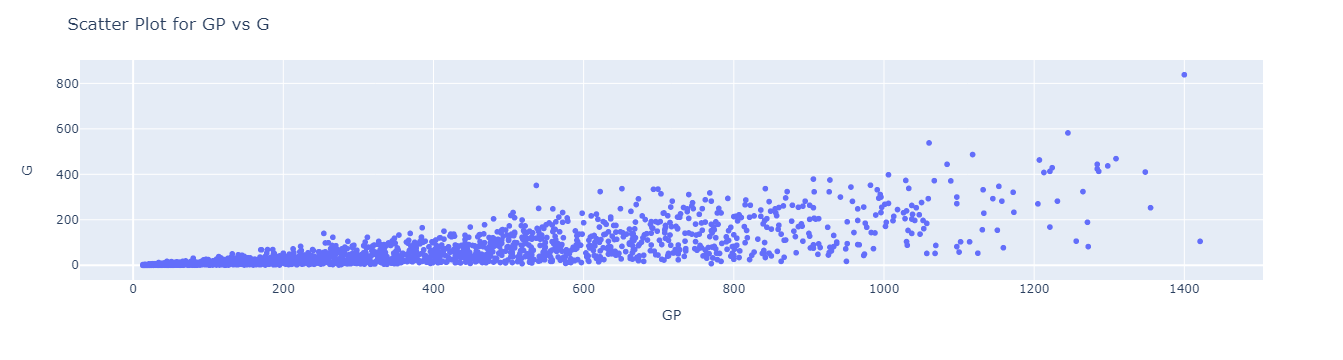

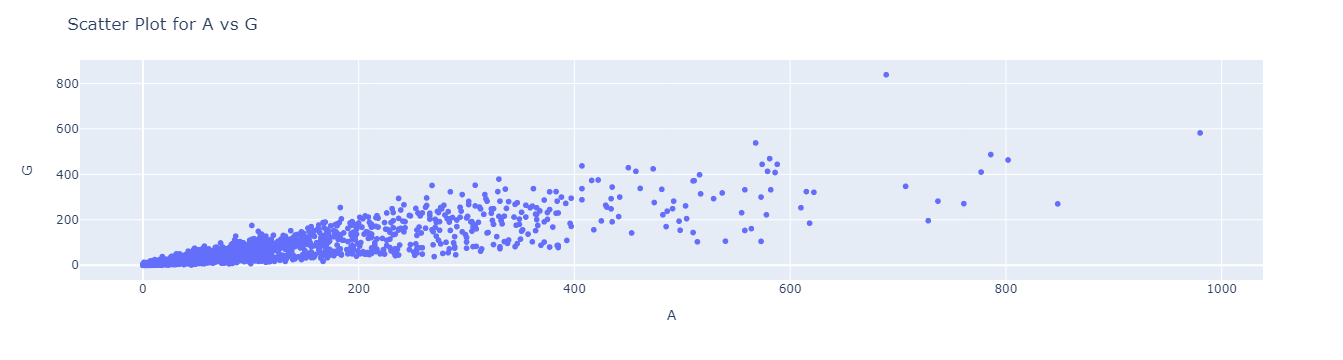

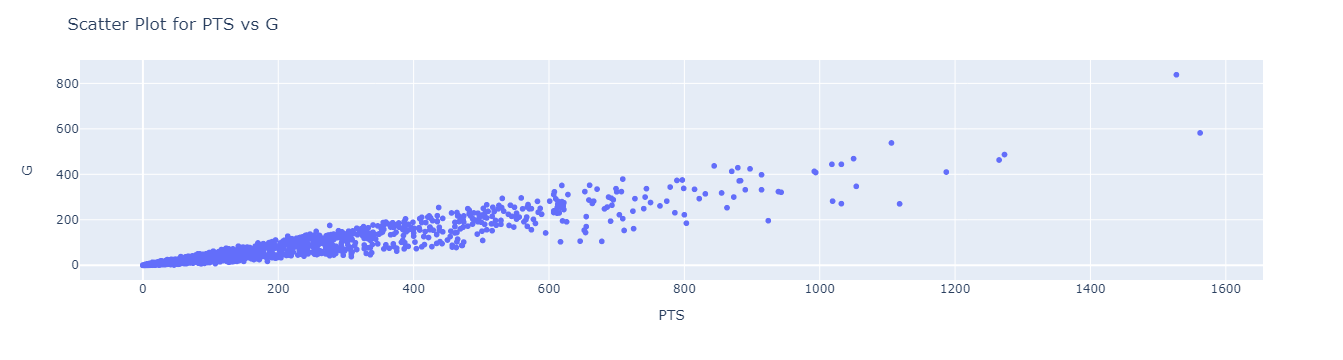

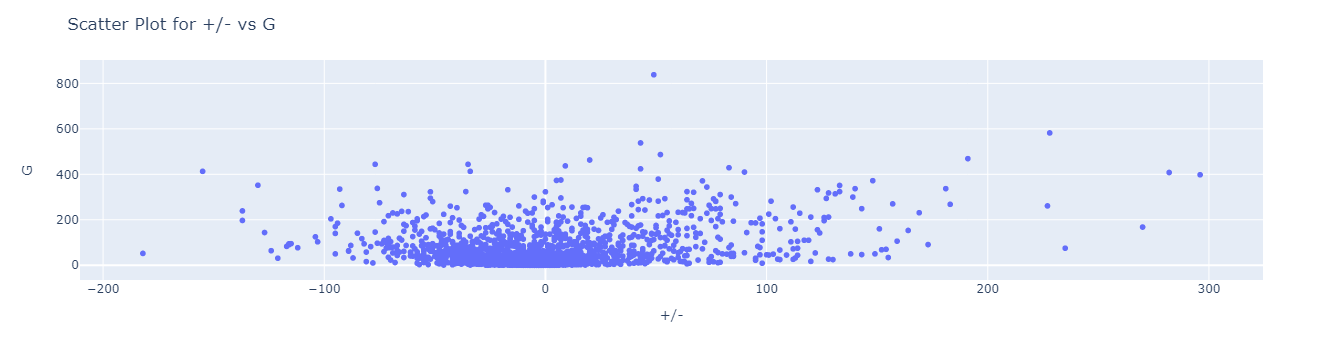

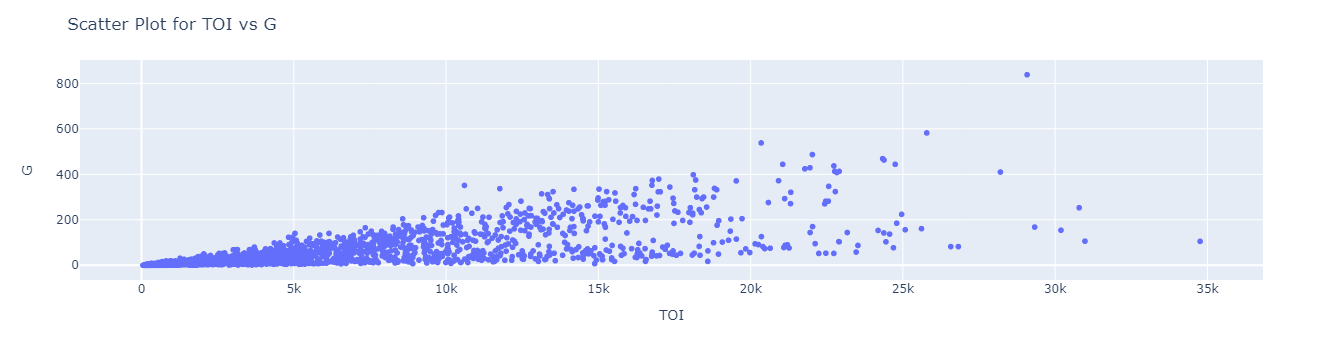

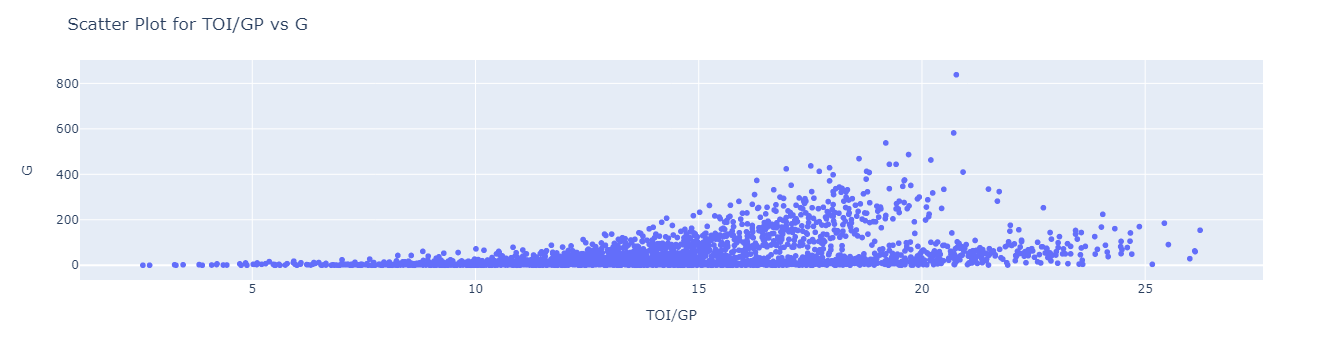

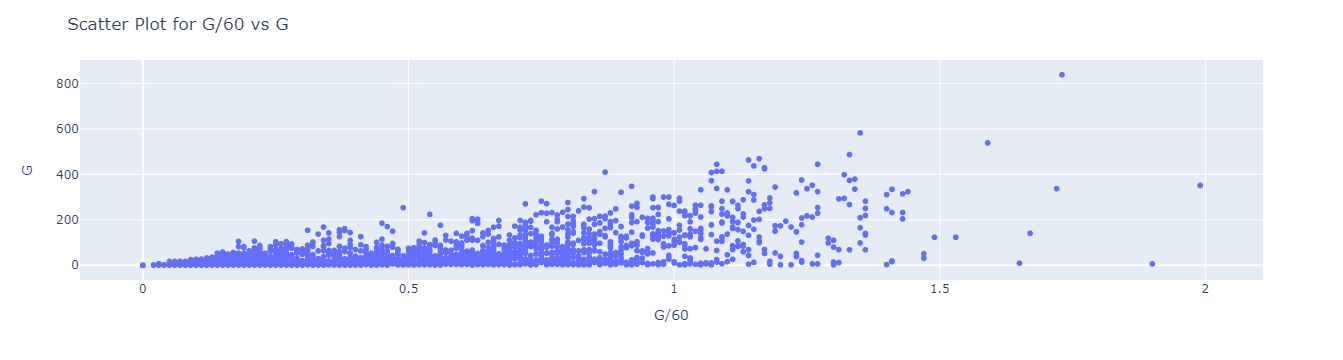

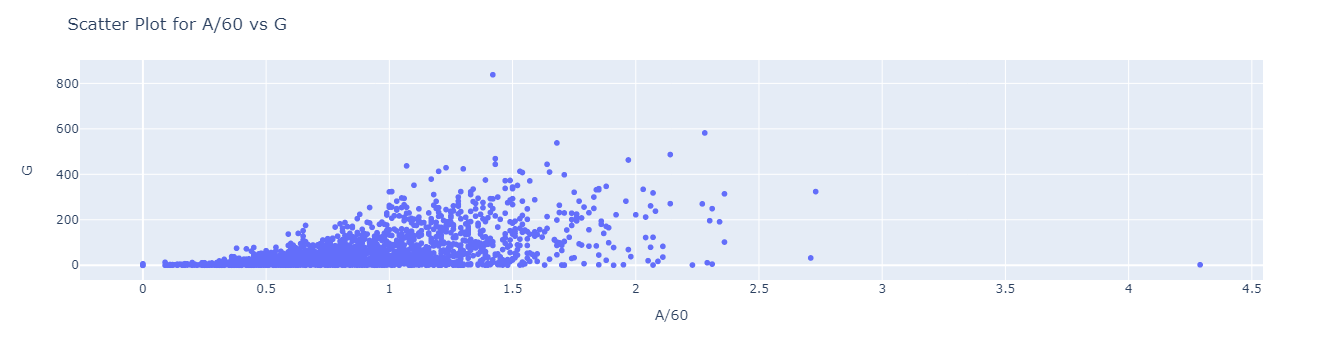

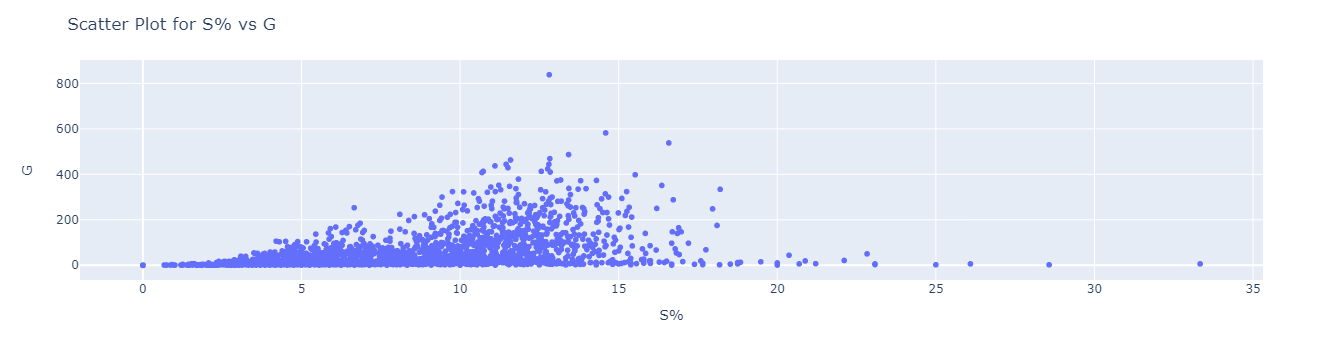

In [37]:
# Plotly for loop --> plotting features against our target variable (Goals('G'))

x_features = ['GP', 'A', 'PTS','+/-','PPG','PPA','Shots','TOI','TOI/GP','G/60','A/60','S%']  # list of x features

for feature in x_features:
    fig = px.scatter(nhl_careertotals, x=feature, y='G', hover_name=nhl_careertotals.index, hover_data=(feature))
    fig.update_layout(title=f'Scatter Plot for {feature} vs G')
    fig.show()

In [35]:
# using a loop to plot all independent variables against our dependent
# I have since replaced with the above plotly interactive plot loop
# for col in X.columns: 
#     plt.figure(figsize=(12,7))
#     plt.scatter(X[col], y)
#     plt.ylabel('Goals')
#     plt.xlabel(col)
#     plt.show()

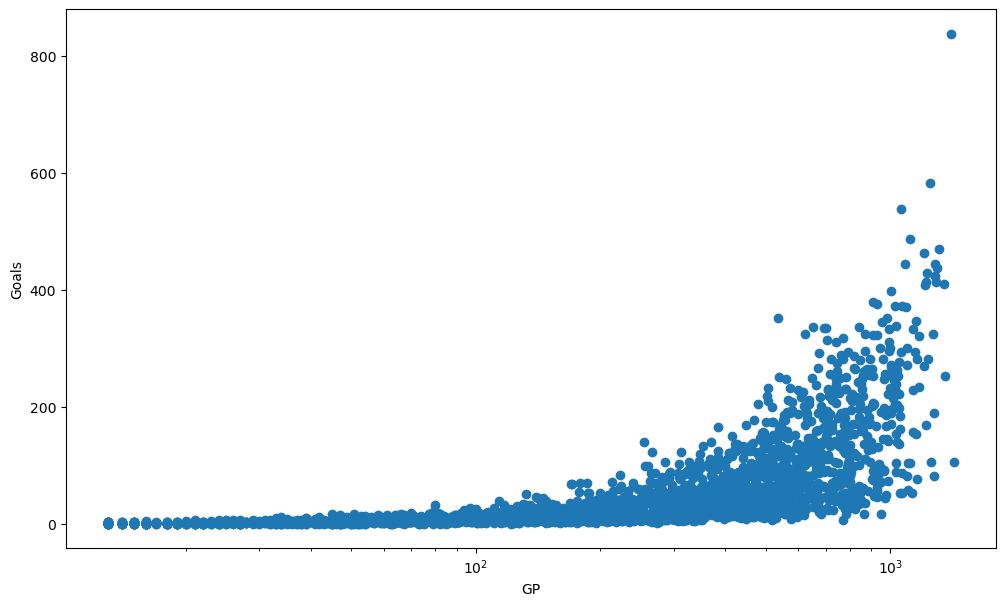

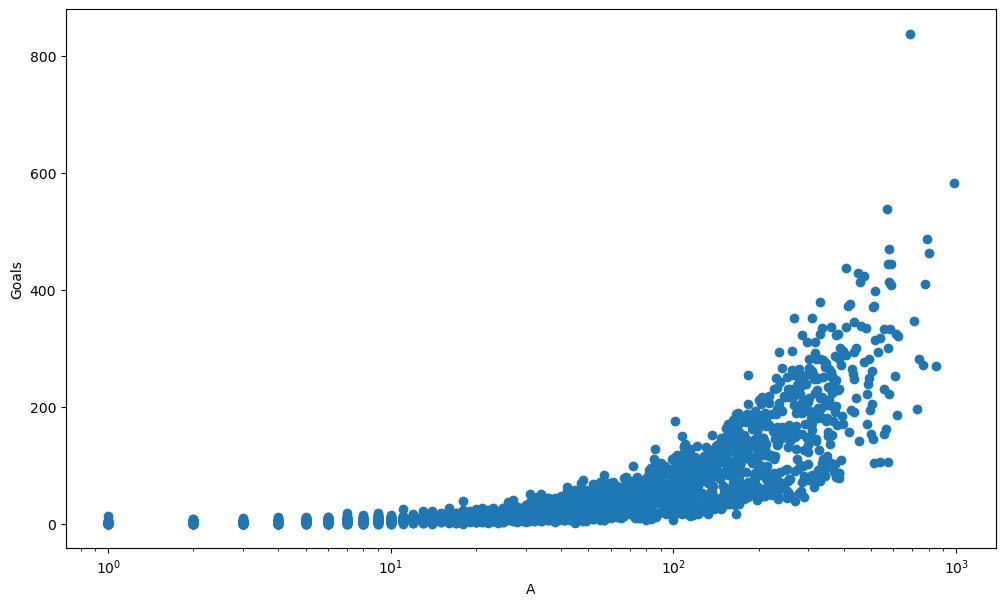

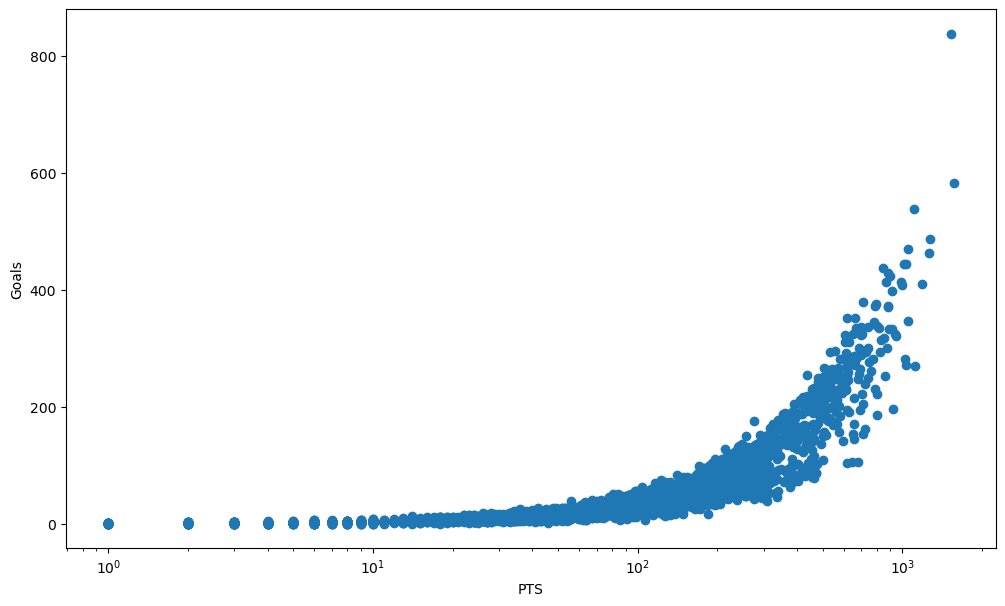

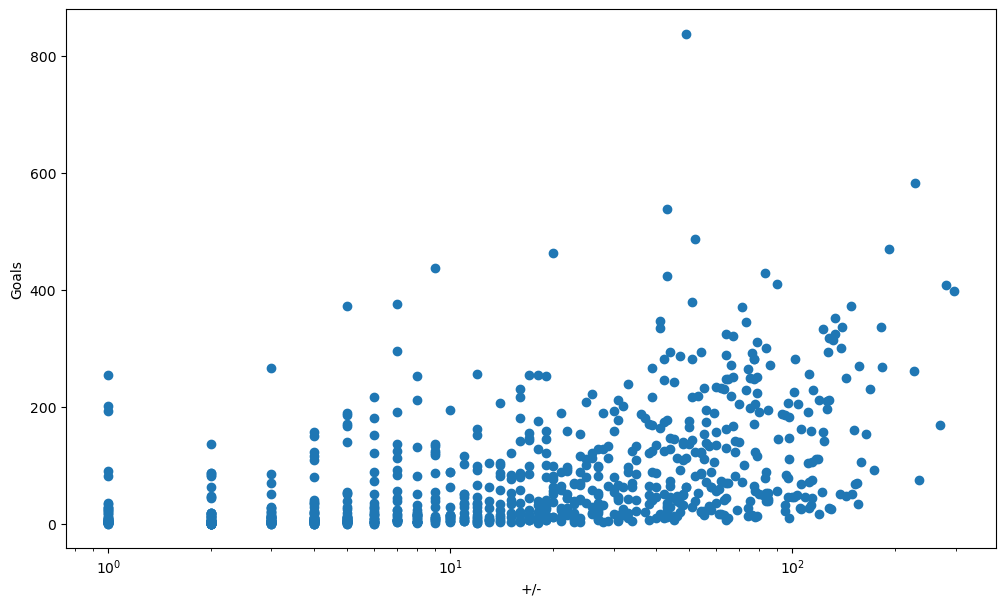

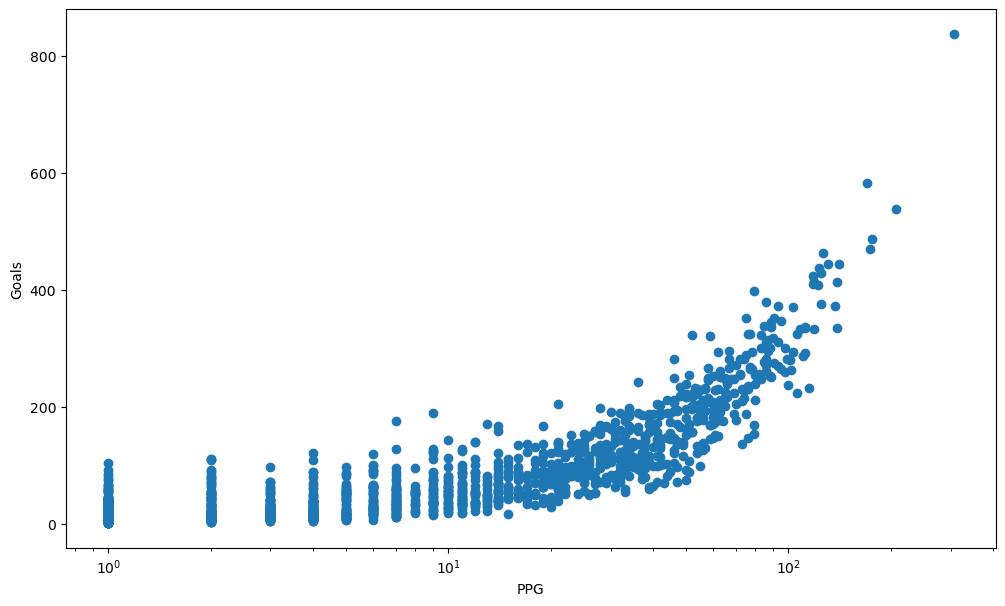

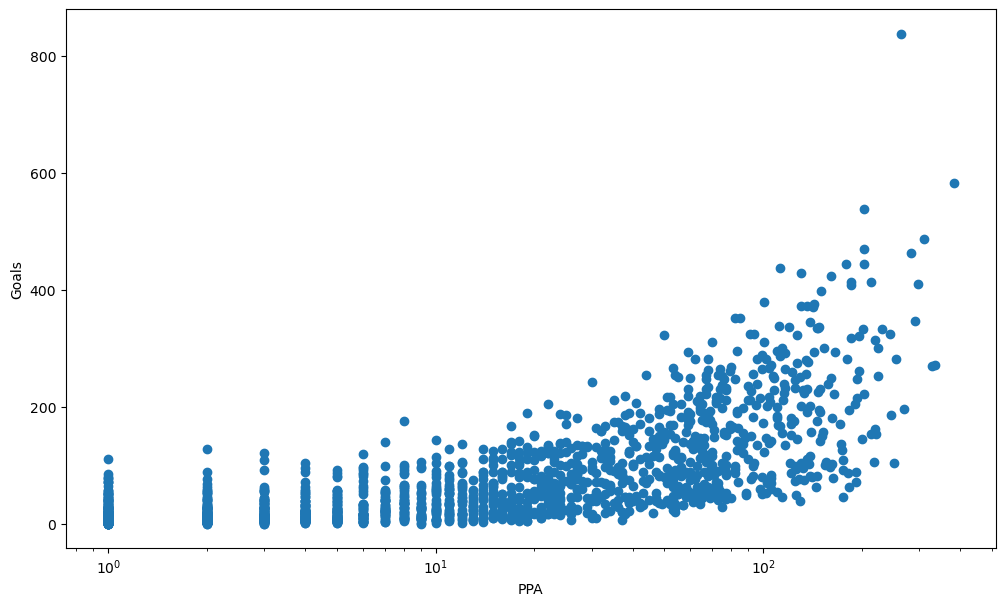

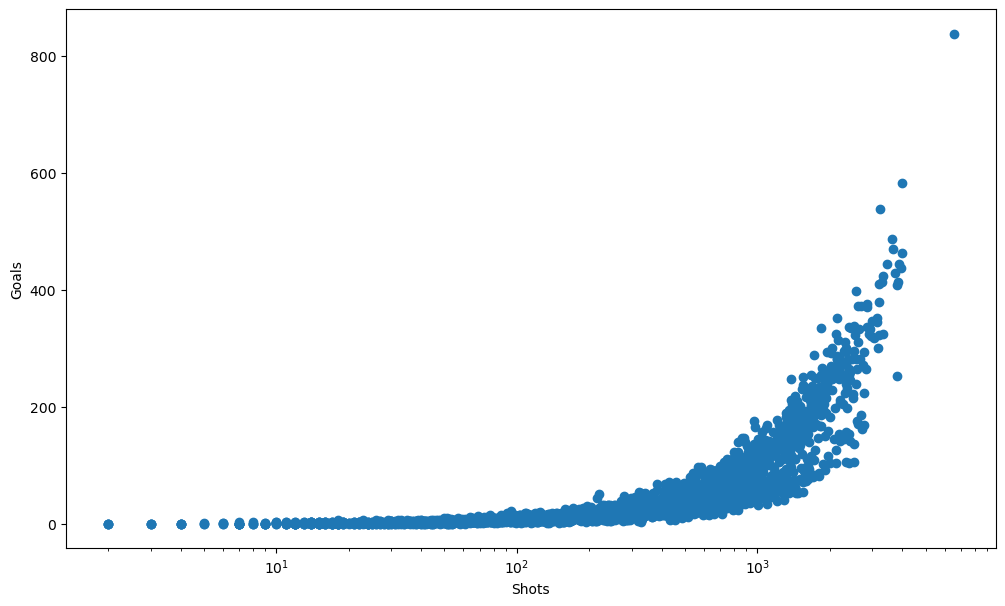

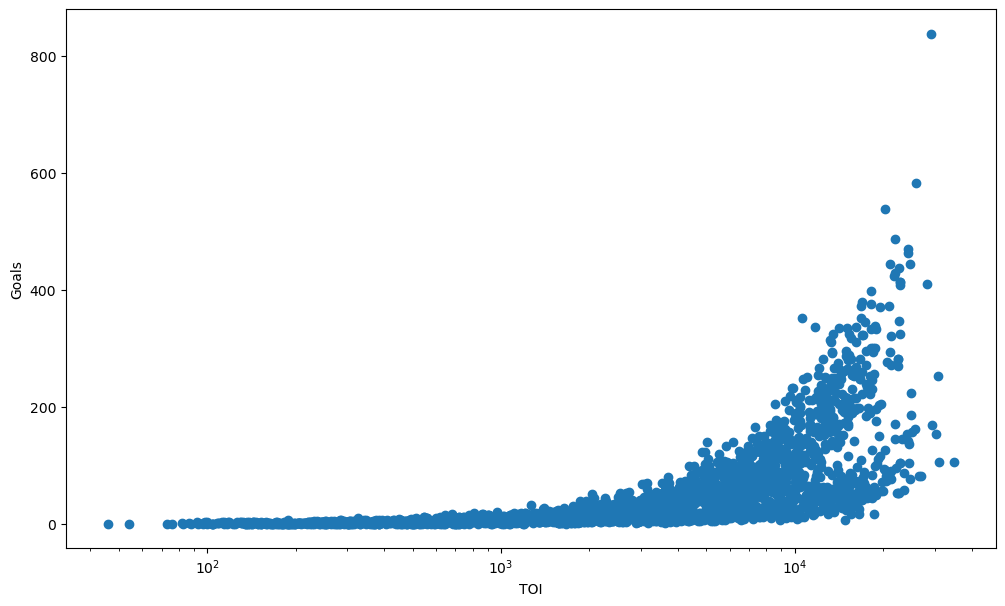

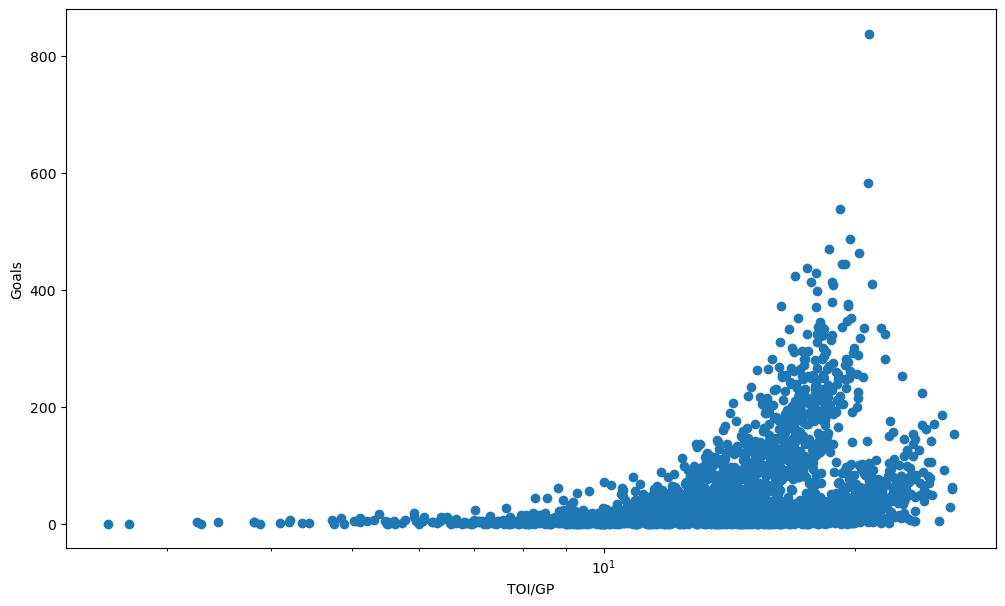

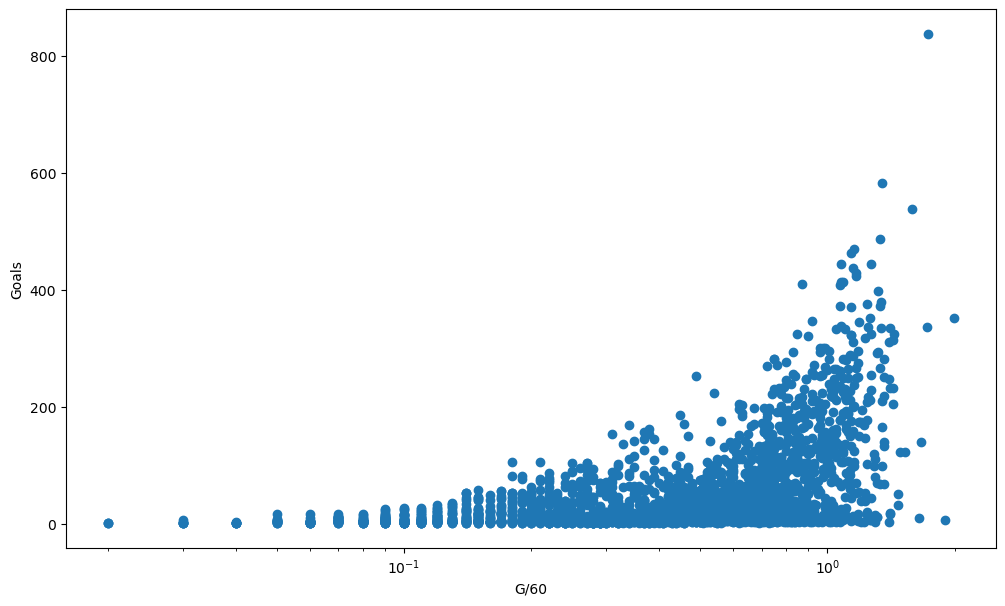

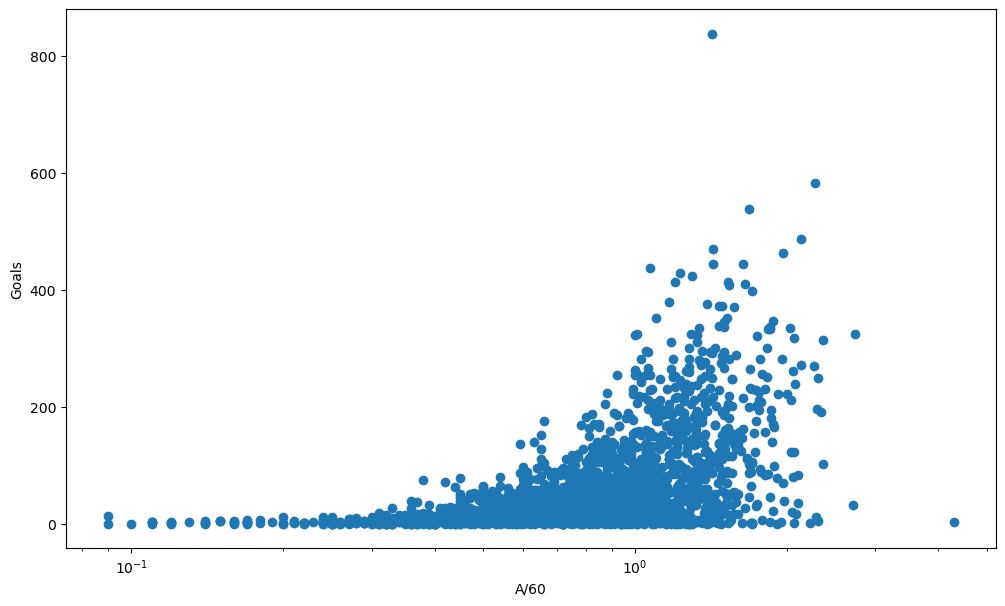

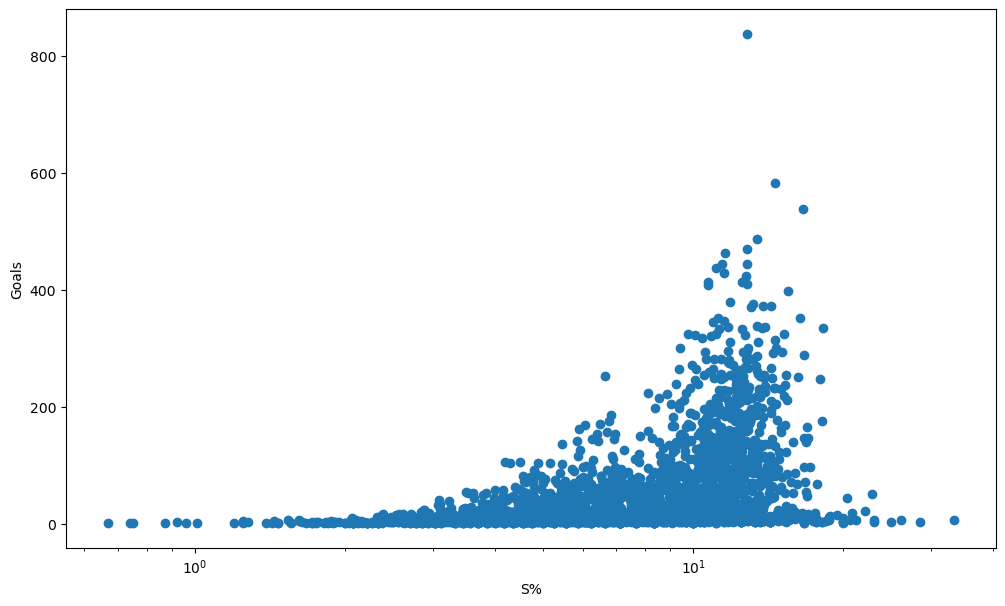

In [38]:
# log plot of features vs the target (G)

y = nhl_careertotals['G']
X = nhl_careertotals.drop(columns=['G']) # every column except 'G'

for col in X.columns:
    plt.figure(figsize=(12,7))
    plt.scatter(X[col], y)
    plt.ylabel('Goals')
    plt.xlabel(col)
    plt.xscale('log')  # Set x-axis to logarithmic scale
    plt.show()

### At this point, we have a cleaned and career-aggregated dataframe with which we can try to run some linear regression on

In [39]:
# modelling time

# setting our dependent and independent variables
y = nhl_careertotals['G']
X = nhl_careertotals.drop(columns=['G']) # every column except 'G'

X_withconstant = sm.add_constant(X)
lm_nhl_careertotals = sm.OLS(y,X_withconstant)
lm_nhl_careertotals_results = lm_nhl_careertotals.fit()
lm_nhl_careertotals_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      G   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.315e+31
Date:                Thu, 07 Mar 2024   Prob (F-statistic):               0.00
Time:                        19:16:10   Log-Likelihood:                 68487.
No. Observations:                2499   AIC:                        -1.369e+05
Df Residuals:                    2486   BIC:                        -1.369e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -9.326e-15    3.6e-14     -0.259      0.796      -8e-14    6.14e-14
GP          6.384e-16   1.33e-16      4.803      0.000    3.78e-16    8.99e-16
A             -1.0000   8.89e-16  -1.13e+15      0.000      -1.000      -1.000
PTS            1.0000   5.64e-16   1.77e+15      0.000       1.000       1.000
+/-        -3.192e-16   1.87e-16     -1.704      0.089   -6.87e-16    4.82e-17
PPG         6.384e-16   1.09e-15      0.584      0.559    -1.5e-15    2.78e-15
PPA        -1.554e-15   7.33e-16     -2.121      0.034   -2.99e-15   -1.17e-16
Shots      -4.215e-16   5.69e-17     -7.413      0.000   -5.33e-16    -3.1e-16
TOI         4.337e-17   8.77e-18      4.947      0.000    2.62e-17    6.06e-17
TOI/GP      2.165e-15   2.49e-15      0.870      0.385   -2.72e-15    7.05e-15
G/60        5.151e-14    5.3e-14      0.971      0.332   -5.25e-14    1.56e-13
A/60        6.661e-16   2.38e-14      0.028      0.978    -4.6e-14    4.74e-14
S%         -1.887e-15   3.47e-15     -0.543      0.587    -8.7e-15    4.93e-15
==============================================================================
Omnibus:                      749.906   Durbin-Watson:                   0.513
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2081.554
Skew:                          -1.577   Prob(JB):                         0.00
Kurtosis:                       6.169   Cond. No.                     6.83e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.83e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [40]:
X.corr()

GP         A       PTS       +/-       PPG       PPA     Shots  \
GP      1.000000  0.861581  0.856475  0.216702  0.680155  0.697875  0.902615   
A       0.861581  1.000000  0.981603  0.342596  0.848139  0.941457  0.928501   
PTS     0.856475  0.981603  1.000000  0.319189  0.909942  0.907491  0.960323   
+/-     0.216702  0.342596  0.319189  1.000000  0.242075  0.285751  0.257278   
PPG     0.680155  0.848139  0.909942  0.242075  1.000000  0.833804  0.876637   
PPA     0.697875  0.941457  0.907491  0.285751  0.833804  1.000000  0.824365   
Shots   0.902615  0.928501  0.960323  0.257278  0.876637  0.824365  1.000000   
TOI     0.968344  0.895163  0.865899  0.276772  0.695712  0.767371  0.901015   
TOI/GP  0.530673  0.566035  0.510613  0.231521  0.410221  0.534658  0.514325   
G/60    0.281753  0.394772  0.494810  0.089296  0.556922  0.359836  0.464004   
A/60    0.352843  0.587640  0.590524  0.222169  0.548878  0.598564  0.491430   
S%      0.204258  0.283130  0.354231  0.060718  0.379902  0.248760  0.290301   

             TOI    TOI/GP      G/60      A/60        S%  
GP      0.968344  0.530673  0.281753  0.352843  0.204258  
A       0.895163  0.566035  0.394772  0.587640  0.283130  
PTS     0.865899  0.510613  0.494810  0.590524  0.354231  
+/-     0.276772  0.231521  0.089296  0.222169  0.060718  
PPG     0.695712  0.410221  0.556922  0.548878  0.379902  
PPA     0.767371  0.534658  0.359836  0.598564  0.248760  
Shots   0.901015  0.514325  0.464004  0.491430  0.290301  
TOI     1.000000  0.649917  0.219206  0.365544  0.145759  
TOI/GP  0.649917  1.000000 -0.007381  0.329096 -0.037581  
G/60    0.219206 -0.007381  1.000000  0.564141  0.873445  
A/60    0.365544  0.329096  0.564141  1.000000  0.450982  
S%      0.145759 -0.037581  0.873445  0.450982  1.000000

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\matrix.py:260: FutureWarning:

Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior



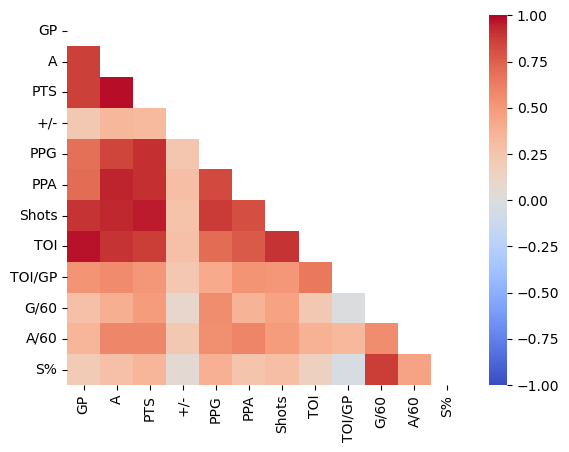

In [41]:
# Calculate all the correlations between each independent variable
corr_df = X.corr()

# Mask for upper-triangular
mask = np.triu(corr_df)

# Visualize with seaborn
plt.figure()
sns.heatmap(corr_df.round(2), annot=True, vmax=1, vmin=-1, center=0, cmap='coolwarm', mask=mask)
plt.show()

#### I am seeing a lot of correlation between my independent variables.<br>
<br>

#### Let's try a logarithmic linear regression...

In [42]:
nhl_careertotals.head()

GP    G    A   PTS  +/-  PPG  PPA  Shots    TOI  TOI/GP  \
Player                                                                     
Sidney Crosby  1245  582  980  1562  228  170  382   3990  25783   20.71   
Alex Ovechkin  1400  838  689  1527   49  306  264   6543  29078   20.77   
Evgeni Malkin  1118  487  786  1273   52  176  310   3630  22029   19.70   
Patrick Kane   1207  463  802  1265   20  126  284   3995  24380   20.20   
Anže Kopitar   1348  410  777  1187   90  118  298   3193  28202   20.92   

               G/60  A/60     S%  
Player                            
Sidney Crosby  1.35  2.28  14.59  
Alex Ovechkin  1.73  1.42  12.81  
Evgeni Malkin  1.33  2.14  13.42  
Patrick Kane   1.14  1.97  11.59  
Anže Kopitar   0.87  1.65  12.84

In [43]:
# nhl_careertotals['X_log'] = np.log(nhl_careertotals + 1)

y = nhl_careertotals['G']
X = nhl_careertotals[['GP','A','PTS','PPG','PPA','Shots','TOI','TOI/GP','G/60','A/60','S%']] # every column except 'G'

# Take the logarithm of the features
X_log = np.log(X + 1e-8)

# Create and fit the linear regression model
model = LinearRegression()
model.fit(X_log, y)

# Print coefficients and intercept
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

Coefficients: [-2.91597104e+03  8.29104284e+00  1.43096704e+00 -2.87797808e-01
 -4.70104411e-01 -2.26988714e+01  2.96445258e+03 -2.89118250e+03
  1.10529216e+02 -1.12319365e+01 -9.52185639e+01]
Intercept: -24.355395056480013


In [ ]:
# This is how we can look at the mean of a particular player's stats
# new_nhl_df.groupby('Player').mean(numeric_only=True).round(2).sort_values(by='PTS', ascending=False).head(30)

In [ ]:
# grouping by player and summing their stats
# nhl_df.groupby('Player').sum(numeric_only=True).sort_values(by='PTS/g', ascending=False).head(30)

# grouping by player  and taking the average of their stats
# nhl_df.groupby('Player').mean(numeric_only=True).round(2).sort_values(by='PTS/g', ascending=False).head(30)

# grouping by player and summing their stats....ordered by total points
# new_nhl_df.groupby('Player').sum(numeric_only=True).sort_values(by='PTS', ascending=False).head(30)

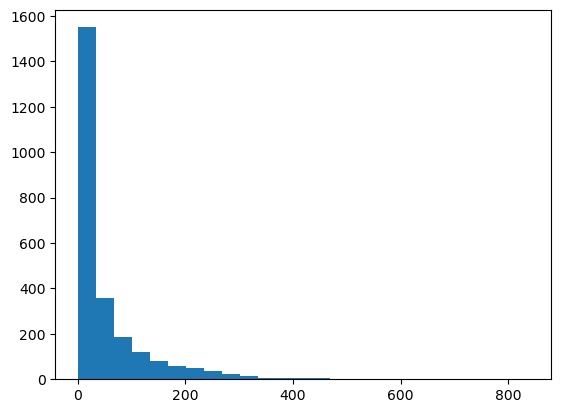

In [44]:
plt.figure()
plt.hist(x=nhl_careertotals['G'], bins=25)
plt.show()

In [45]:
nhl_careertotals['G_log'] = np.log(nhl_careertotals['G'] + 1)

# Plotting the histogram of the logarithm of the data
plt.figure()
plt.hist(x=nhl_careertotals['G_log'], bins=10)
plt.xlabel('Log(G + 1)')
plt.ylabel('Frequency')
plt.title('Histogram of Log(G + 1)')
plt.show()

### Instead of summing career numbers, lets trying taking the average of career numbers
`This represents their average stats per season that they have been in the league`
- NOTE: This mean calculation will not take into account how many games a player has played in a given season
    - It is essesntially an average total extrapolated over an 82 game season
  - These numbers are therefore skewed by the lockout and pandemic shortened seasons
- The GP column will, however, represent the average number of games per season a player has played (also skewed)

In [46]:
# grouping by player and averaging their stats
nhl_careeraverage = nhl_df2.groupby('Player').mean().round(0).sort_values(by=['PTS'], ascending=False)

# nhl_df.loc[:, 'TOI/GP'] = (nhl_df['TOI'] / nhl_df['GP']).round(2)
nhl_careeraverage['TOI/GP'] = ((nhl_careeraverage['TOI'] / nhl_careeraverage['GP']).round(2))
nhl_careeraverage['G/60'] = ((nhl_careeraverage['G'] / nhl_careeraverage['TOI'])*60).round(2)
nhl_careeraverage['A/60'] = ((nhl_careeraverage['A'] / nhl_careeraverage['TOI'])*60).round(2)

# Dropping columns that are confused by averaging method
nhl_careeraverage.drop(columns=['Age','Year','S%', 'PtSh'], inplace=True)

# Sorting by goals/60 --> this metric is a strong indicator of goal scoring prowess!
nhl_careeraverage.sort_values(by=['G'], ascending=False).head(10)

GP     G     A    PTS   +/-   PPG   PPA  Shots     TOI  \
Player                                                                      
Auston Matthews  67.0  44.0  34.0   77.0  17.0  11.0  10.0  268.0  1326.0   
Alex Ovechkin    74.0  44.0  36.0   80.0   3.0  16.0  14.0  344.0  1530.0   
Connor McDavid   69.0  36.0  68.0  104.0  15.0   8.0  27.0  236.0  1501.0   
Kirill Kaprizov  64.0  35.0  39.0   74.0  12.0  12.0  14.0  221.0  1260.0   
Ilya Kovalchuk   70.0  34.0  34.0   67.0  -9.0  11.0  15.0  244.0  1502.0   
Steven Stamkos   66.0  34.0  36.0   69.0   3.0  13.0  13.0  203.0  1272.0   
David Pastrňák   65.0  34.0  36.0   70.0  14.0  11.0  12.0  241.0  1176.0   
Leon Draisaitl   69.0  33.0  48.0   82.0   4.0  14.0  15.0  184.0  1420.0   
Dany Heatley     75.0  32.0  35.0   68.0   8.0  12.0  13.0  224.0  1488.0   
Jarome Iginla*   77.0  31.0  35.0   66.0   1.0  10.0  12.0  237.0  1516.0   

                 TOI/GP  G/60  A/60  
Player                               
Auston Matthews   19.79  1.99  1.54  
Alex Ovechkin     20.68  1.73  1.41  
Connor McDavid    21.75  1.44  2.72  
Kirill Kaprizov   19.69  1.67  1.86  
Ilya Kovalchuk    21.46  1.36  1.36  
Steven Stamkos    19.27  1.60  1.70  
David Pastrňák    18.09  1.73  1.84  
Leon Draisaitl    20.58  1.39  2.03  
Dany Heatley      19.84  1.29  1.41  
Jarome Iginla*    19.69  1.23  1.39

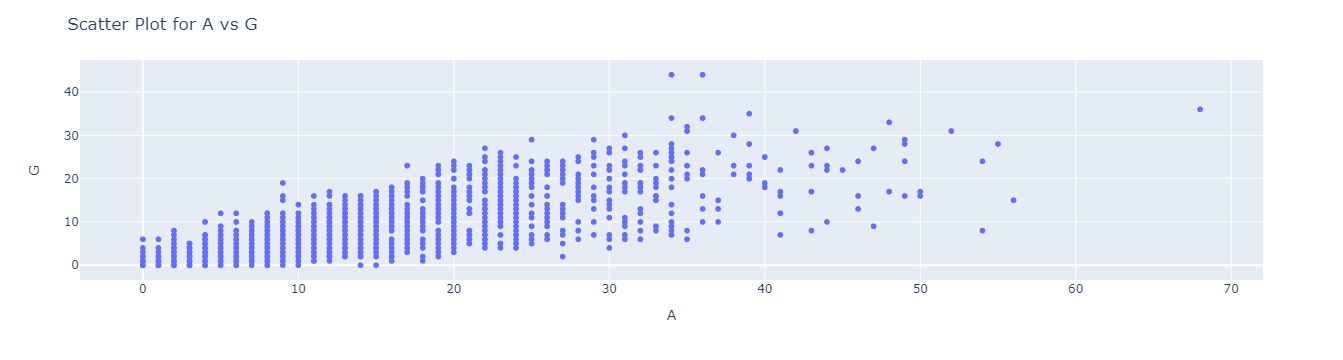

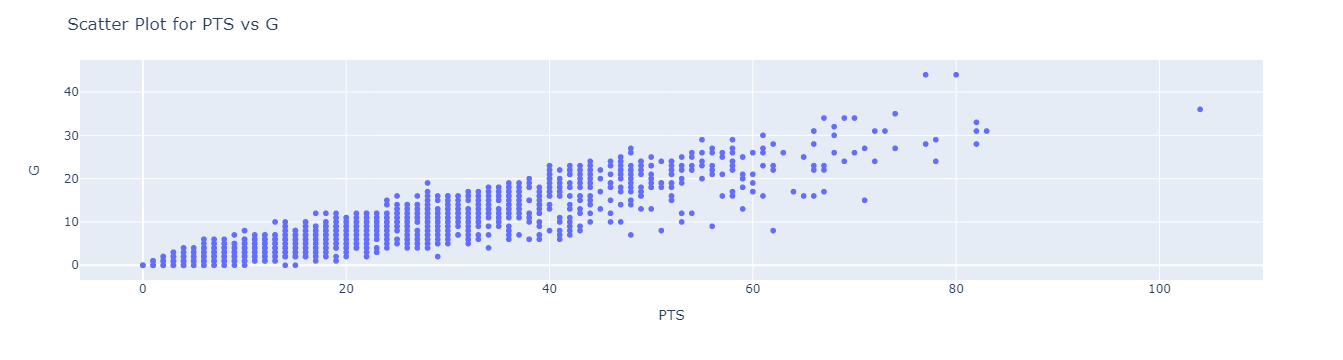

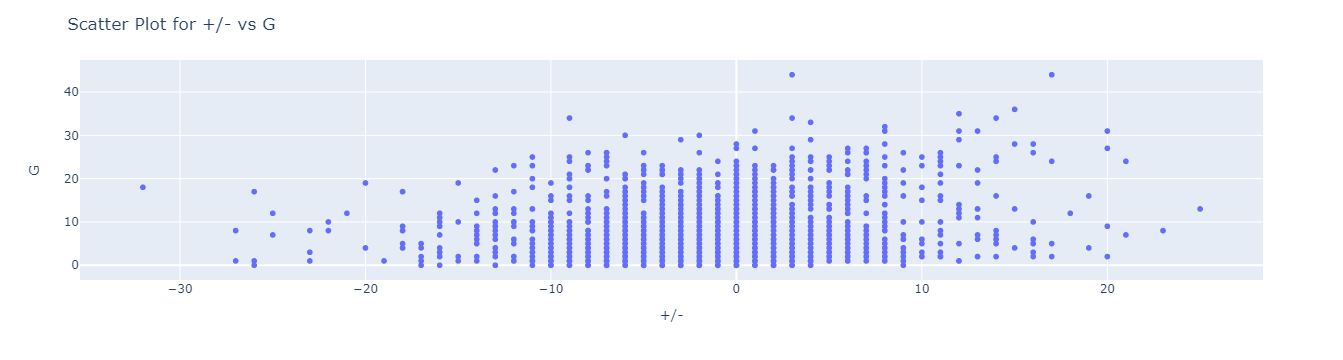

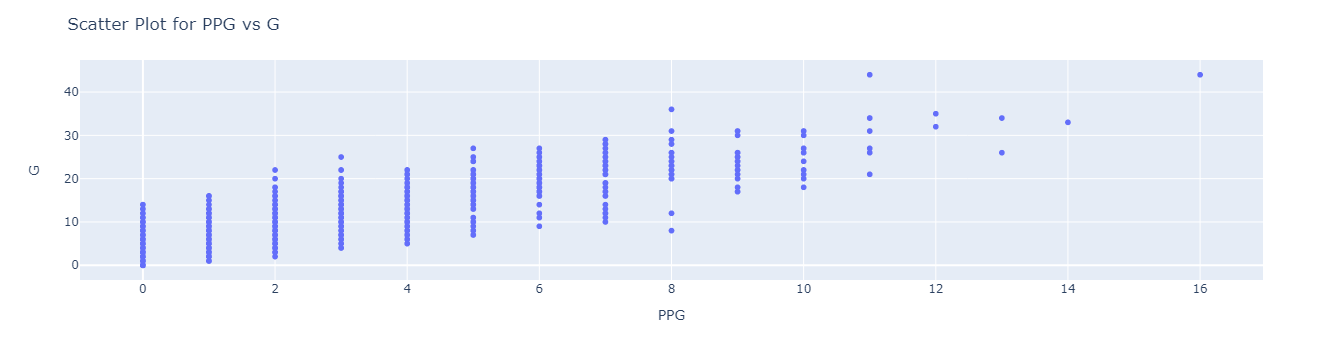

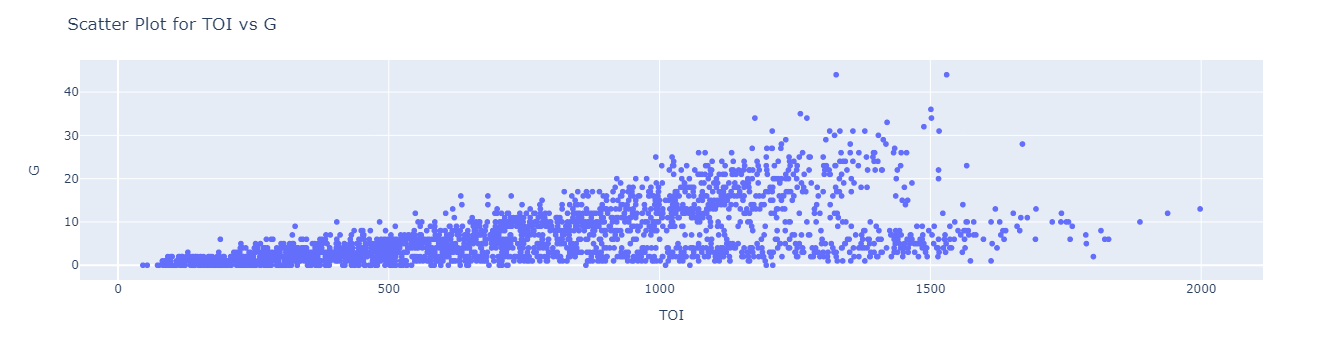

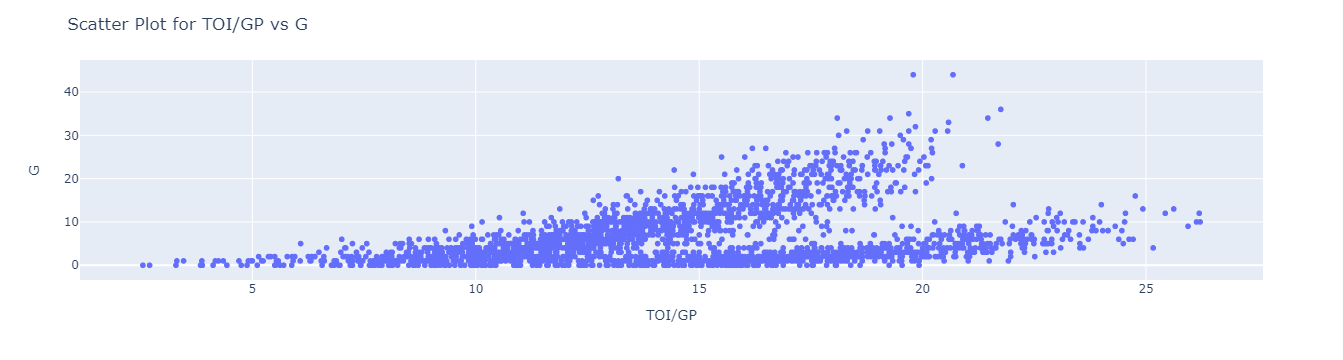

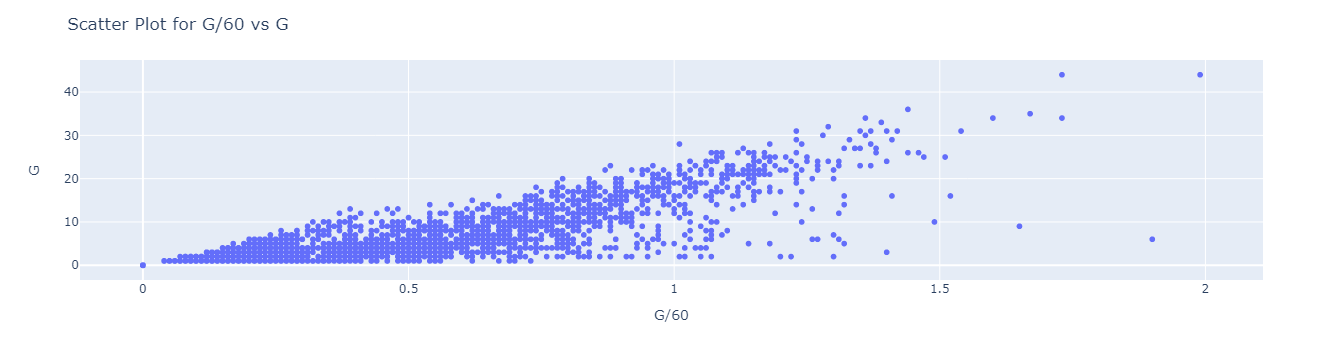

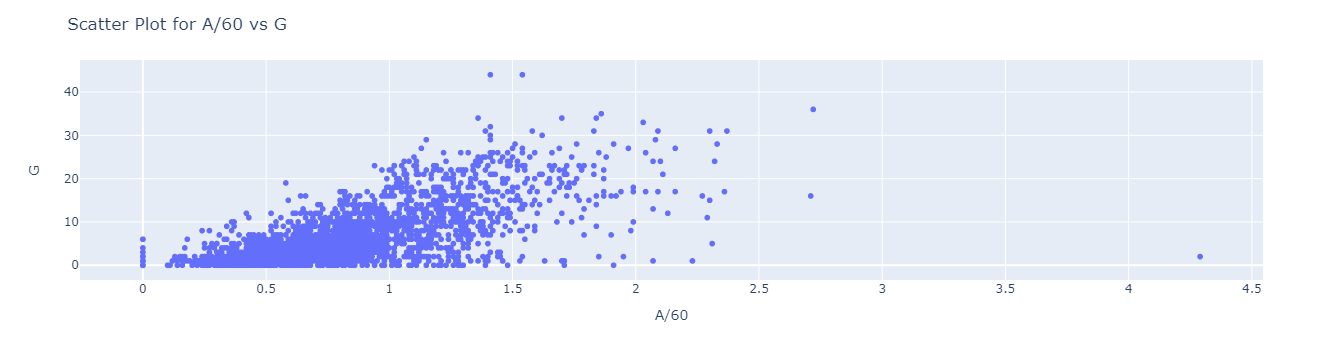

In [49]:
x_features = ['GP', 'A', 'PTS','+/-','PPG','PPA','Shots','TOI','TOI/GP','G/60','A/60']  # list of x features

for feature in x_features:
    fig = px.scatter(nhl_careeraverage, x=feature, y='G', hover_name=nhl_careeraverage.index, hover_data=(feature))
    fig.update_layout(title=f'Scatter Plot for {feature} vs G')
    fig.show()

In [50]:
# modelling time

# setting our dependent and independent variables
y = nhl_careeraverage['G']
X = nhl_careeraverage.drop(columns=['G']) # every column except 'G'

X_withconstant = sm.add_constant(X)
lm_nhl_careeraverage = sm.OLS(y,X_withconstant)
lm_nhl_careeraverage_results = lm_nhl_careeraverage.fit()
lm_nhl_careeraverage_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      G   R-squared:                       0.995
Model:                            OLS   Adj. R-squared:                  0.995
Method:                 Least Squares   F-statistic:                 4.691e+04
Date:                Thu, 07 Mar 2024   Prob (F-statistic):               0.00
Time:                        19:18:08   Log-Likelihood:                -1595.9
No. Observations:                2499   AIC:                             3216.
Df Residuals:                    2487   BIC:                             3286.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.5011      0.106     -4.714      0.000      -0.709      -0.293
GP             0.0064      0.002      2.795      0.005       0.002       0.011
A             -0.8411      0.011    -77.511      0.000      -0.862      -0.820
PTS            0.8884      0.007    128.707      0.000       0.875       0.902
+/-           -0.0006      0.002     -0.345      0.730      -0.004       0.003
PPG            0.0744      0.011      6.842      0.000       0.053       0.096
PPA           -0.0476      0.007     -6.667      0.000      -0.062      -0.034
Shots          0.0043      0.001      7.033      0.000       0.003       0.005
TOI           -0.0007      0.000     -4.145      0.000      -0.001      -0.000
TOI/GP         0.0242      0.008      3.017      0.003       0.008       0.040
G/60           0.9547      0.065     14.665      0.000       0.827       1.082
A/60          -0.2258      0.052     -4.348      0.000      -0.328      -0.124
==============================================================================
Omnibus:                       48.791   Durbin-Watson:                   1.973
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              100.600
Skew:                           0.005   Prob(JB):                     1.43e-22
Kurtosis:                       3.983   Cond. No.                     1.02e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.02e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [51]:
# Check the correlations
X.corr()

GP         A       PTS       +/-       PPG       PPA     Shots  \
GP      1.000000  0.696086  0.700115  0.138751  0.493548  0.494180  0.758905   
A       0.696086  1.000000  0.966258  0.295299  0.773352  0.904717  0.862330   
PTS     0.700115  0.966258  1.000000  0.267128  0.857837  0.852820  0.924555   
+/-     0.138751  0.295299  0.267128  1.000000  0.119764  0.168475  0.196543   
PPG     0.493548  0.773352  0.857837  0.119764  1.000000  0.768173  0.811609   
PPA     0.494180  0.904717  0.852820  0.168475  0.768173  1.000000  0.732642   
Shots   0.758905  0.862330  0.924555  0.196543  0.811609  0.732642  1.000000   
TOI     0.880146  0.803641  0.752132  0.233595  0.552094  0.654775  0.776582   
TOI/GP  0.527307  0.657841  0.569176  0.230583  0.425779  0.587903  0.563347   
G/60    0.312023  0.477935  0.651113  0.111601  0.660799  0.393166  0.628070   
A/60    0.371722  0.793949  0.781626  0.250286  0.634095  0.712840  0.629543   

             TOI    TOI/GP      G/60      A/60  
GP      0.880146  0.527307  0.312023  0.371722  
A       0.803641  0.657841  0.477935  0.793949  
PTS     0.752132  0.569176  0.651113  0.781626  
+/-     0.233595  0.230583  0.111601  0.250286  
PPG     0.552094  0.425779  0.660799  0.634095  
PPA     0.654775  0.587903  0.393166  0.712840  
Shots   0.776582  0.563347  0.628070  0.629543  
TOI     1.000000  0.841336  0.192387  0.413014  
TOI/GP  0.841336  1.000000 -0.004973  0.327636  
G/60    0.192387 -0.004973  1.000000  0.557289  
A/60    0.413014  0.327636  0.557289  1.000000

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\matrix.py:260: FutureWarning:

Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior



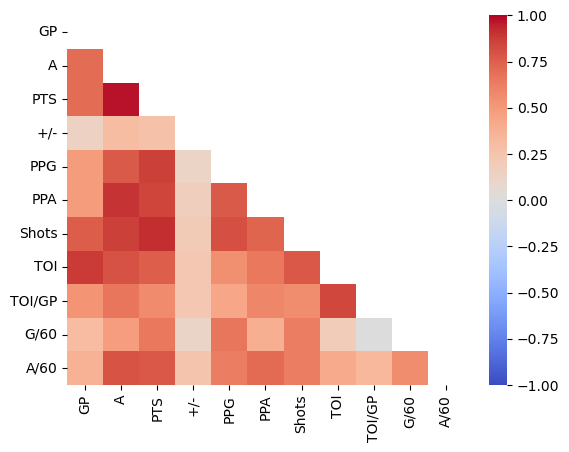

In [53]:
# Calculate all the correlations between each independent variable
corr_df2 = X.corr()

# Mask for upper-triangular
mask = np.triu(corr_df2)

# Visualize with seaborn
plt.figure()
sns.heatmap(corr_df2.round(2), annot=True, vmax=1, vmin=-1, center=0, cmap='coolwarm', mask=mask)
plt.show()